In [123]:
import pandas as pd
import os,sys, imp, glob
sys.path.append('./src/')
import doc_utils_clean as doc_utils
import feature_utils, common_utils
import defines
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn_crfsuite.utils import flatten

In [124]:
dir_name="reparse"

### Find example of lemma and sentece

# Check most common lemmas

In [7]:
imp.reload(common_utils)
sent_pos_db =  common_utils.concat_dbs(dir_name,"sent_pos_db",[],'db_idx')#['LEMMA','FORM','sent_idx','POSTAG'],'db_idx')
sent_pos_db

file_idx  db_idx  FROM   sent_idx  TO    FORM LEMMA CPOSTAG POSTAG  \
0              1       0     0   0.000000   1      אז    אז      RB     RB   
1              1       1     1   0.000000   2    היום  היום      RB     RB   
2              1       2     2   0.000000   3   אנחנו   הוא     PRP    PRP   
3              1       3     3   0.000000   4  נפגשים  נפגש      BN     BN   
4              1       4     4   0.000000   5      פה    פה     NNP    NNP   
...          ...     ...   ...        ...  ..     ...   ...     ...    ...   
561463        80    5827     0 529.000000   1     היה   היה     COP    COP   
561464        80    5828     1 529.000000   2       ל     ל      IN     IN   
561465        80    5829     2 529.000000   3     אני   אני   S_PRN  S_PRN   
561466        80    5830     3 529.000000   4    מאוד  מאוד      RB     RB   
561467        80    5831     4 529.000000   5     קשה   קשה      RB     RB   

                          FEATS  TOKEN f_gen f_num f_per f_suf_gen f_suf_num  \
0                             _      1   NaN   NaN   NaN       NaN       NaN   
1                             _      2   NaN   NaN   NaN       NaN       NaN   
2       gen=F|gen=M|num=P|per=1      3     M     P     1       NaN       NaN   
3             gen=M|num=P|per=A      4     M     P     A       NaN       NaN   
4                   gen=M|num=S      5     M     S   NaN       NaN       NaN   
...                         ...    ...   ...   ...   ...       ...       ...   
561463        gen=M|num=S|per=3      1     M     S     3       NaN       NaN   
561464                        _      2   NaN   NaN   NaN       NaN       NaN   
561465  gen=F|gen=M|num=S|per=1      2     M     S     1       NaN       NaN   
561466                        _      3   NaN   NaN   NaN       NaN       NaN   
561467                        _      4   NaN   NaN   NaN       NaN       NaN   

        f_suf_per f_tense  doc_idx  
0             NaN     NaN 1.000000  
1             NaN     NaN 1.000000  
2             NaN     NaN 1.000000  
3             NaN     NaN 1.000000  
4             NaN     NaN 1.000000  
...           ...     ...      ...  
561463        NaN     NaN      NaN  
561464        NaN     NaN      NaN  
561465        NaN     NaN      NaN  
561466        NaN     NaN      NaN  
561467        NaN     NaN      NaN  

[561468 rows x 19 columns]

In [10]:
sent_pos_db['f_per'].unique()

array([nan, '1', 'A', '2', '3'], dtype=object)

In [158]:
sent_pos_db[sent_pos_db['f_tense']== 'IMPERATIVE'].value_counts('FORM').reset_index().loc[:10,:]

FORM   0
0    הכל  67
1     לך  66
2    בוא  54
3    היי  42
4   בואי  41
5    זהו  40
6     של  29
7   עזבי  27
8    קחי  18
9    נוח  13
10    שא  11

In [80]:
sent_pos_db[sent_pos_db['FORM']== 'קיבוץ']

file_idx  db_idx  FROM   sent_idx  TO   FORM  LEMMA CPOSTAG POSTAG  \
48660          8     121     6  10.000000   7  קיבוץ  קיבוץ      NN     NN   
48666          8     127    12  10.000000  13  קיבוץ  קיבוץ      NN     NN   
52926          8    4387     4 268.000000   5  קיבוץ  קיבוץ      NN     NN   
53038          8    4499    10 274.000000  11  קיבוץ  קיבוץ      NN     NN   
140047        20    1745     7 122.000000   8  קיבוץ  קיבוץ      NN     NN   
140740        20    2438     8 159.000000   9  קיבוץ  קיבוץ      NN     NN   
140758        20    2456     5 159.000000   6  קיבוץ  קיבוץ      NN     NN   
156948        22    2797    10 143.000000  11  קיבוץ  קיבוץ      NN     NN   
158794        22    4643    10 263.000000  11  קיבוץ  קיבוץ      NN     NN   
159498        22    5347    18 298.000000  19  קיבוץ  קיבוץ      NN     NN   
160218        22    6067    41 343.000000  42  קיבוץ  קיבוץ      NN     NN   
160227        22    6076     8 344.000000   9  קיבוץ  קיבוץ      NN     NN   
160791        22    6640    16 379.000000  17  קיבוץ  קיבוץ      NN     NN   
161847        22    7696     9 434.000000  10  קיבוץ  קיבוץ      NN     NN   
162840        23     324    13  20.000000  14  קיבוץ  קיבוץ      NN     NN   
162884        23     368     3  24.000000   4  קיבוץ  קיבוץ      NN     NN   
166641        23    4125    18 228.000000  19  קיבוץ  קיבוץ      NN     NN   
166867        23    4351    16 236.000000  17  קיבוץ  קיבוץ      NN     NN   
178372        25     259    10  21.000000  11  קיבוץ  קיבוץ      NN     NN   
181248        25    3135     9 225.000000  10  קיבוץ  קיבוץ      NN     NN   
181789        25    3676    11 261.000000  12  קיבוץ  קיבוץ      NN     NN   
181812        25    3699     4 262.000000   5  קיבוץ  קיבוץ      NN     NN   
182907        25    4794    11 331.000000  12  קיבוץ  קיבוץ      NN     NN   
183920        25    5807     4 410.000000   5  קיבוץ  קיבוץ      NN     NN   
191522        27     731    10  41.000000  11  קיבוץ  קיבוץ      NN     NN   
191542        27     751    12  42.000000  13  קיבוץ  קיבוץ      NN     NN   
193118        27    2327    13 139.000000  14  קיבוץ  קיבוץ      NN     NN   
212430        30     121     6  10.000000   7  קיבוץ  קיבוץ      NN     NN   
212436        30     127    12  10.000000  13  קיבוץ  קיבוץ      NN     NN   
216600        30    4291     4 263.000000   5  קיבוץ  קיבוץ      NN     NN   
216785        30    4476    15 271.000000  16  קיבוץ  קיבוץ      NN     NN   
232044        32    6072     5 364.000000   6  קיבוץ  קיבוץ      NN     NN   
232092        32    6120     4 367.000000   5  קיבוץ  קיבוץ      NN     NN   
516411        73    2938    20 199.000000  21  קיבוץ  קיבוץ      NN     NN   

              FEATS  TOKEN f_gen f_num f_per f_suf_gen f_suf_num  f_suf_per  \
48660   gen=M|num=S      4     M     S   NaN       NaN       NaN        NaN   
48666   gen=M|num=S      8     M     S   NaN       NaN       NaN        NaN   
52926   gen=M|num=S      3     M     S   NaN       NaN       NaN        NaN   
53038   gen=M|num=S      6     M     S   NaN       NaN       NaN        NaN   
140047  gen=M|num=S      7     M     S   NaN       NaN       NaN        NaN   
140740  gen=M|num=S      7     M     S   NaN       NaN       NaN        NaN   
140758  gen=M|num=S      3     M     S   NaN       NaN       NaN        NaN   
156948  gen=M|num=S      7     M     S   NaN       NaN       NaN        NaN   
158794  gen=M|num=S      8     M     S   NaN       NaN       NaN        NaN   
159498  gen=M|num=S     13     M     S   NaN       NaN       NaN        NaN   
160218  gen=M|num=S     30     M     S   NaN       NaN       NaN        NaN   
160227  gen=M|num=S      7     M     S   NaN       NaN       NaN        NaN   
160791  gen=M|num=S     12     M     S   NaN       NaN       NaN        NaN   
161847  gen=M|num=S      5     M     S   NaN       NaN       NaN        NaN   
162840  gen=M|num=S     10     M     S   NaN       NaN       NaN        NaN   
162884  gen=M

### Find words with different forms that gave same lemmas

In [72]:
sent_pos_db[sent_pos_db['LEMMA']=="זכר"].drop_duplicates("FORM")

doc_idx  db_idx   sent_idx    FORM LEMMA POSTAG
1948          1    1948 169.000000   זוכרת   זכר     BN
1956          1    1956 170.000000    זוכר   זכר     BN
8539          2     365  37.000000   זכרתי   זכר     VB
24955         4    2840 243.000000   לזכור   זכר     VB
111109       16    4217 248.000000   זכרנו   זכר     NN
131700       19      29   7.000000    זכרת   זכר     VB
137110       19    5439 265.000000     זכר   זכר     VB
173373       24    4866 352.000000  זוכרים   זכר     BN
209970       29    5593 361.000000   תזכור   זכר     VB
340487       48    3429 315.000000    זכור   זכר     BN
371419       53    4404 404.000000   אזכור   זכר     VB
428453       61     849  65.000000    זכרה   זכר     VB
491261       69    5436 670.000000   יזכור   זכר     VB

### Found example of PoS counter per sentence

In [270]:
sent_pos_db_2=common_utils.load_db(dir_name, "02_sent_pos_db")

Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/02_sent_pos_db.csv,  index False


In [273]:
common_utils.save_db(sent_pos_db_2.query('sent_idx==604'),dir_name,"selected_sent")

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/selected_sent.csv,  index False


In [276]:
with pd.option_context('display.max_columns', None):
    display(merged_db.query('doc_idx==1 and merged_idx==541'))

doc_idx  merged_idx  is_question   is_nar  par_idx_in_doc  \
1218        2         605     0.000000 0.000000      151.000000   

      par_pos_in_doc  sent_len  is_client  sent_idx_in_par  sent_pos_in_par  \
1218        0.968153 19.000000          1                1         1.000000   

      sent_pos_in_doc  TOKEN  POSTAG_ADVERB  POSTAG_AT  POSTAG_BN  POSTAG_BNT  \
1218         0.929448      4       0.000000   0.000000   0.250000    0.000000   

      POSTAG_CC  POSTAG_CD  POSTAG_CDT  POSTAG_CONJ  POSTAG_COP  POSTAG_DEF  \
1218   0.000000   0.000000    0.000000     0.000000    0.000000    0.250000   

      POSTAG_DT  POSTAG_DTT  POSTAG_EX  POSTAG_IN  POSTAG_INTJ  POSTAG_JJ  \
1218   0.000000    0.000000   0.000000   0.000000     0.000000   0.000000   

      POSTAG_JJT  POSTAG_MD  POSTAG_NN  POSTAG_NNP  POSTAG_NNT  POSTAG_P  \
1218    0.000000   0.000000   0.000000    0.000000    0.250000  0.000000   

      POSTAG_POS  POSTAG_PREPOSITION  POSTAG_PRP  POSTAG_QW  POSTAG_RB  \
1218    0.000000            0.250000    0.500000   0.000000   0.000000   

      POSTAG_REL  POSTAG_S_PRN  POSTAG_TEMP  POSTAG_VB  f_gen_F  f_gen_M  \
1218    0.000000      0.000000     0.000000   0.000000 0.000000 1.000000   

      f_num_D  f_num_P  f_num_S  f_suf_gen_F  f_suf_gen_M  f_suf_num_P  \
1218 0.000000 0.000000 1.000000     0.000000     0.000000     0.000000   

      f_suf_num_S  f_suf_per_1.0  f_suf_per_2.0  f_suf_per_3.0  f_per_1  \
1218     0.000000       0.000000       0.000000       0.000000 0.250000   

      f_per_2  f_per_3  f_per_A  f_tense_BEINONI  f_tense_FUTURE  \
1218 0.000000 0.250000 0.250000         0.000000        0.000000   

      f_tense_IMPERATIVE  f_tense_PAST  POSTAG_NEG  POSTAG_yyCM  POSTAG_TTL  
1218            0.000000      0.000000         NaN          NaN         NaN

In [278]:
sent_pos_db_2.query('sent_idx==605')

FROM   sent_idx  TO    FORM  LEMMA      CPOSTAG       POSTAG  \
6260     0 605.000000   1       ל      ל  PREPOSITION  PREPOSITION   
6261     1 605.000000   2       ה      ה          DEF          DEF   
6262     2 605.000000   3      זה     זה          PRP          PRP   
6263     3 605.000000   4     אני    הוא          PRP          PRP   
6264     4 605.000000   5    מחפש   חיפש           BN           BN   
6265     5 605.000000   6  פיתרון  פתרון          NNT          NNT   

                        FEATS  TOKEN f_gen f_num f_per f_tense f_suf_gen  \
6260                        _      1   NaN   NaN   NaN     NaN       NaN   
6261                        _      1   NaN   NaN   NaN     NaN       NaN   
6262        gen=M|num=S|per=3      1     M     S     3     NaN       NaN   
6263  gen=F|gen=M|num=S|per=1      2     M     S     1     NaN       NaN   
6264        gen=M|num=S|per=A      3     M     S     A     NaN       NaN   
6265              gen=M|num=S      4     M     S   NaN     NaN       NaN   

     f_suf_num  f_suf_per  doc_idx  
6260       NaN        NaN      NaN  
6261       NaN        NaN      NaN  
6262       NaN        NaN      NaN  
6263       NaN        NaN      NaN  
6264       NaN        NaN      NaN  
6265       NaN        NaN      NaN

In [274]:
sent_pos_db_1=common_utils.load_db(dir_name, "01_sent_pos_db")

Opened /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/01_sent_pos_db.csv,  index False


In [326]:
sent_pos_db_1.query('sent_idx==307')

FROM   sent_idx  TO    FORM LEMMA CPOSTAG POSTAG  \
3524     0 307.000000   1     אני   הוא     PRP    PRP   
3525     1 307.000000   2      לא    לא      RB     RB   
3526     2 307.000000   3    בטוח  בטוח      JJ     JJ   
3527     3 307.000000   4       ש     ש     REL    REL   
3528     4 307.000000   5  סיפרתי  סיפר      VB     VB   
3529     5 307.000000   6      את    את      AT     AT   
3530     6 307.000000   7      זה    זה     PRP    PRP   

                                   FEATS  TOKEN f_gen f_num f_per f_suf_gen  \
3524             gen=F|gen=M|num=S|per=1      1     M     S     1       NaN   
3525                                   _      2   NaN   NaN   NaN       NaN   
3526                         gen=M|num=S      3     M     S   NaN       NaN   
3527                                   _      4   NaN   NaN   NaN       NaN   
3528  gen=F|gen=M|num=S|per=1|tense=PAST      4     M     S     1       NaN   
3529                                   _      5   NaN   NaN   NaN       NaN   
3530                   gen=M|num=S|per=3      6     M     S     3       NaN   

     f_suf_num  f_suf_per f_tense  doc_idx  
3524       NaN        NaN     NaN      NaN  
3525       NaN        NaN     NaN      NaN  
3526       NaN        NaN     NaN      NaN  
3527       NaN        NaN     NaN      NaN  
3528       NaN        NaN    PAST      NaN  
3529       NaN        NaN     NaN      NaN  
3530       NaN        NaN     NaN      NaN

In [325]:
common_utils.save_db(sent_pos_db_1.query('sent_idx==307'),dir_name,"selected_lemma")

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/stat.csv,  index False


In [320]:
with pd.option_context('display.max_columns', None):
    display(merged_db.query('doc_idx==1 and merged_idx==307'))

doc_idx  merged_idx  is_question   is_nar  par_idx_in_doc  \
307        1         307     0.000000 1.000000      125.000000   

     par_pos_in_doc  sent_len  is_client  sent_idx_in_par  sent_pos_in_par  \
307        0.614634 25.000000          1               11         0.206897   

     sent_pos_in_doc  TOKEN  POSTAG_ADVERB  POSTAG_AT  POSTAG_BN  POSTAG_BNT  \
307         0.502447      6       0.000000   0.166667   0.000000    0.000000   

     POSTAG_CC  POSTAG_CD  POSTAG_CDT  POSTAG_CONJ  POSTAG_COP  POSTAG_DEF  \
307   0.000000   0.000000    0.000000     0.000000    0.000000    0.000000   

     POSTAG_DT  POSTAG_DTT  POSTAG_EX  POSTAG_IN  POSTAG_INTJ  POSTAG_JJ  \
307   0.000000    0.000000   0.000000   0.000000     0.000000   0.166667   

     POSTAG_JJT  POSTAG_MD  POSTAG_NN  POSTAG_NNP  POSTAG_NNT  POSTAG_P  \
307    0.000000   0.000000   0.000000    0.000000    0.000000  0.000000   

     POSTAG_POS  POSTAG_PREPOSITION  POSTAG_PRP  POSTAG_QW  POSTAG_RB  \
307    0.000000            0.000000    0.333333   0.000000   0.166667   

     POSTAG_REL  POSTAG_S_PRN  POSTAG_TEMP  POSTAG_VB  f_gen_F  f_gen_M  \
307    0.166667      0.000000     0.000000   0.166667 0.000000 0.666667   

     f_num_D  f_num_P  f_num_S  f_suf_gen_F  f_suf_gen_M  f_suf_num_P  \
307 0.000000 0.000000 0.666667     0.000000     0.000000     0.000000   

     f_suf_num_S  f_suf_per_1.0  f_suf_per_2.0  f_suf_per_3.0  f_per_1  \
307     0.000000       0.000000       0.000000       0.000000 0.333333   

     f_per_2  f_per_3  f_per_A  f_tense_BEINONI  f_tense_FUTURE  \
307 0.000000 0.166667 0.000000         0.000000        0.000000   

     f_tense_IMPERATIVE  f_tense_PAST  POSTAG_NEG  POSTAG_yyCM  POSTAG_TTL  
307            0.000000      0.166667         NaN          NaN         NaN

In [332]:
headers = merged_db.query('doc_idx==1 and merged_idx==307').iloc[0]
new_df  = pd.DataFrame(merged_db.query('doc_idx==1 and merged_idx==307').values[1:], columns=headers)
new_df

Empty DataFrame
Columns: [1.0, 307.0, 0.0, 1.0, 125.0, 0.6146341463414634, 25.0, 1.0, 11.0, 0.2068965517241379, 0.5024469820554649, 6.0, 0.0, 0.1666666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1666666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.1666666666666666, 0.1666666666666666, 0.0, 0.0, 0.1666666666666666, 0.0, 0.6666666666666666, 0.0, 0.0, 0.6666666666666666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.1666666666666666, 0.0, 0.0, 0.0, 0.0, 0.1666666666666666, nan, nan, nan]
Index: []

In [298]:
merged_db.iloc[merged_db['f_tense_PAST'].idxmax(),:]

doc_idx               12.000000
merged_idx           258.000000
is_question            0.000000
is_nar                 1.000000
par_idx_in_doc        65.000000
                        ...    
f_tense_IMPERATIVE     0.000000
f_tense_PAST           2.000000
POSTAG_NEG                  NaN
POSTAG_yyCM                 NaN
POSTAG_TTL                  NaN
Name: 6595, Length: 66, dtype: float64

In [315]:
sent_label_db.query('doc_idx==1 and is_nar==1 and nar_idx==6')

file_idx  sent_idx  is_question  \
306         1       306     0.000000   
307         1       307     0.000000   
308         1       308     0.000000   
309         1       309     0.000000   
310         1       310     0.000000   
311         1       311     0.000000   
312         1       312     1.000000   
313         1       313     0.000000   
314         1       314     0.000000   
315         1       315     0.000000   
316         1       316     0.000000   
317         1       317     0.000000   
318         1       318     0.000000   
319         1       319     0.000000   
320         1       320     1.000000   
321         1       321     0.000000   
322         1       322     0.000000   
323         1       323     0.000000   
324         1       324     0.000000   
325         1       325     0.000000   
326         1       326     0.000000   
327         1       327     0.000000   
328         1       328     0.000000   
329         1       329     0.000000   
330         1       330     0.000000   
331         1       331     0.000000   
332         1       332     0.000000   
333         1       333     0.000000   
334         1       334     0.000000   
335         1       335     0.000000   
336         1       336     0.000000   
337         1       337     0.000000   
338         1       338     0.000000   
339         1       339     0.000000   
340         1       340     0.000000   
341         1       341     0.000000   
342         1       342     0.000000   
343         1       343     0.000000   
344         1       344     0.000000   
345         1       345     0.000000   
346         1       346     0.000000   
347         1       347     0.000000   
348         1       348     0.000000   
349         1       349     0.000000   
350         1       350     0.000000   
351         1       351     0.000000   
352         1       352     0.000000   
353         1       353     0.000000   
354         1       354     0.000000   
355         1       355     0.000000   
356         1       356     1.000000   
357         1       357     1.000000   
358         1       358     1.000000   
359         1       359     1.000000   
360         1       360     0.000000   
361         1       361     0.000000   
362         1       362     0.000000   
363         1       363     0.000000   
364         1       364     0.000000   

                                                  text  sent_idx_in_block  \
306   פעם היה איזה  כשהגעתי לחברה בערך חצי שנה אחרי...           0.000000   
307                          אני לא בטוח שסיפרתי את זה           1.000000   
308                        ו  שאלו מי מגיע מי מגיע וזה           2.000000   
309  ואז הגיעו אליי עוד הייתי עם כל הלבוש הדוסי הזה...           3.000000   
310                 תבוא תבוא יהיה נחמד אתה תראה מה זה           4.000000   
311                                         תראה מה זה           5.000000   
312  ולא אז עוד לא ידעתי מה זה ולא וחשבתי על זה טוב...           6.000000   
313      ואז הלכתי ו ואמרתי ההורים שלי שאלו אותי מה זה           7.000000   
314  אמרתי להם שהולכים לאיזו מסעדה בתל אביב ידעתי ש...           8.000000   
315  והלכתי לשם וזה היה איזשהו בר למפרע התברר שזה מ...           9.000000   
316         וזהו ואני זוכר שישבנו שם כמה אנשים מהעבודה          10.000000   
317                                       ולא הבנתי מה          11.000000   
318             כאילו שאלתי אותם כל הזמן מה הקונספט פה          12.000000   
319  כאילו אנחנו יושבים ויש מוזיקה בקולי קולות אני ...          13.000000   
320                                        אז מה עושים          14.000000   
321  כאילו גם אין אוכל על השולחן כאילו זה לא שאוכלי...          15.000000   
322                               ולא הבנתי מה קורה שם          16.000000   
323          והם אמרו לי בהמשך אתה תראה בהמשך אתה תראה          17.000000   
324          זהו ואז התחילו להגיע עוד אנשים ועוד אנשים          18.000000   
325  באיזשהו שלב התחילו להביא שתייה כאילו זה היה אי...          

In [84]:
sent_label_db[sent_label_db['text'].str.contains('כלל')].groupby('is_nar').size()

is_nar
0.000000    495
1.000000    183
dtype: int64

In [307]:
sent_label_db.query('doc_idx == 12 and sent_idx==259')['text'].tolist()

['והם עזבו  באותו שלב איזה  123  בחורים ככה מיד עזבו']

In [7]:
sent_label_db = common_utils.concat_dbs(dir_name,"sent_db")

In [248]:
sent_label_db[sent_label_db['text'].str.contains('הבעיות שלי סובבות סביב')]

file_idx  sent_idx  is_question  \
1217          2       604     0.000000   
34788        71       607     0.000000   

                                                text  sent_idx_in_block  \
1217   זה אומר ש  זה בעצם  הבעיות שלי סובבות סביב זה           0.000000   
34788  זה אומר ש  זה בעצם  הבעיות שלי סובבות סביב זה           0.000000   

       block_idx   is_nar   doc_idx  par_db_idx  par_idx_in_doc  \
1217  158.000000 0.000000  2.000000  151.000000      151.000000   
34788 157.000000 0.000000 71.000000  151.000000      151.000000   

       par_pos_in_doc par_type block_type  nar_idx  sent_len  is_client  \
1217         0.968153   client    not_nar 0.000000 45.000000          1   
34788        0.968153   client    not_nar 0.000000 45.000000          1   

       sent_idx_in_par  sent_pos_in_par  sent_pos_in_doc  
1217                 0         0.500000         0.927914  
34788                0         0.500000         0.928244

In [49]:
sent_label_db.query('file_idx==1 and sent_idx==219')['text'].tolist()

[' נאי זוכר סתם איזו סיטואציה שישבנו מול הטלוויזיה אני ואחותי ואני זוכר שצבטתי אותה']

In [247]:
sent_pos_db.query('doc_idx==1 and sent_idx==219')

doc_idx  db_idx   sent_idx      FORM     LEMMA POSTAG
2454        1    2454 219.000000       נאי       נאה    JJT
2455        1    2455 219.000000      זוכר       זכר     BN
2456        1    2456 219.000000       סתם       סתם     RB
2457        1    2457 219.000000      איזו      איזה     QW
2458        1    2458 219.000000  סיטואציה  סיטואציה     NN
2459        1    2459 219.000000         ש         ש    REL
2460        1    2460 219.000000     ישבנו      יישב     VB
2461        1    2461 219.000000       מול       מול     IN
2462        1    2462 219.000000         ה         ה    DEF
2463        1    2463 219.000000  טלוויזיה  טלוויזיה     NN
2464        1    2464 219.000000       אני       הוא    PRP
2465        1    2465 219.000000         ו         ו   CONJ
2466        1    2466 219.000000     אחותי        אח     NN
2467        1    2467 219.000000         ו         ו   CONJ
2468        1    2468 219.000000       אני       הוא    PRP
2469        1    2469 219.000000      זוכר       זכר     BN
2470        1    2470 219.000000         ש         ש    REL
2471        1    2471 219.000000     צבטתי       צבט     VB
2472        1    2472 219.000000        את        את     AT
2473        1    2473 219.000000       היא       היא  S_PRN

### Find example of non-narrative

In [280]:
with pd.option_context('display.max_colwidth', None,'display.max_rows', None): 
    display(sent_label_db.loc[120:129,:])

file_idx  sent_idx  is_question  \
120         1       120     0.000000   
121         1       121     0.000000   
122         1       122     0.000000   
123         1       123     0.000000   
124         1       124     0.000000   
125         1       125     0.000000   
126         1       126     0.000000   
127         1       127     0.000000   
128         1       128     0.000000   
129         1       129     0.000000   

                                                                                           text  \
120  האחות הקטנה מבין שלושתן היא היא מגיעה בשבת בלילה היא גרה קרוב אלינו אז היא באה לאכול אצלנו   
121                                      הגדולה תמיד אמרו שאני הכי דומה להכי גדולה ית קוראים לה   
122                                                                            אממ  ובסגנון וזה   
123                                                                              גם במראה כאילו   
124                                                       גם במראה וגם ב תמיד אמרו שאנחנו דומים   
125                                               השנייה היא יותר צדיקה היא גרה באלעד בעלה אברך   
126                                                                    משפחה יותר הם יותר דוסים   
127                                    והשלישית היא רגילה בתור ילד הייתי מציק לה הרבה היום בסדר   
128                                                                       אנחנו יחסים אה רגילים   
129                                                            יש לכם הרבה רגיל במשפחה אני שומע   

     sent_idx_in_block  block_idx   is_nar  doc_idx  par_db_idx  \
120           3.000000  60.000000 0.000000 1.000000   57.000000   
121           4.000000  60.000000 0.000000 1.000000   57.000000   
122           5.000000  60.000000 0.000000 1.000000   57.000000   
123           6.000000  60.000000 0.000000 1.000000   57.000000   
124           7.000000  60.000000 0.000000 1.000000   57.000000   
125           8.000000  60.000000 0.000000 1.000000   57.000000   
126           9.000000  60.000000 0.000000 1.000000   57.000000   
127          10.000000  60.000000 0.000000 1.000000   57.000000   
128          11.000000  60.000000 0.000000 1.000000   57.000000   
129           0.000000  61.000000 0.000000 1.000000   58.000000   

     par_idx_in_doc  par_pos_in_doc   par_type block_type  nar_idx  sent_len  \
120       57.000000        0.282927     client    not_nar 0.000000 90.000000   
121       57.000000        0.282927     client    not_nar 0.000000 54.000000   
122       57.000000        0.282927     client    not_nar 0.000000 16.000000   
123       57.000000        0.282927     client    not_nar 0.000000 14.000000   
124       57.000000        0.282927     client    not_nar 0.000000 37.000000   
125       57.000000        0.282927     client    not_nar 0.000000 45.000000   
126       57.000000        0.282927     client    not_nar 0.000000 24.000000   
127       57.000000        0.282927     client    not_nar 0.000000 56.000000   
128       57.000000        0.282927     client    not_nar 0.000000 21.000000   
129       58.000000        0.287805  therapist    not_nar 0.000000 33.000000   

     is_client  sent_idx_in_par  sent_pos_in_par  sent_pos_in_doc  
120          1                3         0.333333         0.197390  
121          1                4         0.416667         0.199021  
122          1                5         0.500000         0.200653  
123          1                6         0.583333         0.202284  
124          1                7         0.666667         0.203915  
125          1                8         0.750000         0.205546  
126          1                9         0.833333         0.207178  
127          1               10         0.916667         0.208809  
128          1               11         1.000000         0.210440  
129          0                0         1.000000         0.212072

### Compare merged and non-merged sentences

In [26]:
no_merged_db = common_utils.concat_dbs('reparse_no_merge',"sent_lemma_db")

In [32]:
no_merged_db

doc_idx  sent_idx                                     sent_lemma
0            1         0  אז היום הוא נפגש פה ב _ אבל שבוע ה בא ב חמישי
1            1         1                                             כן
2            1         2                                          אוקיי
3            1         3                                       מה ש לום
4            1         4                                   ב ה רוך ה שם
...        ...       ...                                            ...
46108       80       630                     ש הוא הרגיש ב ה הוא לא נוח
46109       80       631                    אז כאילו למה למה הוא התגעגע
46110       80       632                         או למה הוא למה הוא רצה
46111       80       633                          ו ה צלחת ענה ל ה עצמו
46112       80       634                             היה ל אני מאוד קשה

[46113 rows x 3 columns]

In [28]:
no_merged_db.groupby('doc_idx')['sent_idx'].count()

sent_idx  sent_lemma
doc_idx                      
1             660         660
2             845         845
3             865         865
4             566         566
5             577         577
...           ...         ...
76            570         570
77            500         500
78            208         208
79            299         299
80            635         635

[80 rows x 2 columns]

In [30]:
sent_label_db.groupby('doc_idx')['sent_idx'].count()

doc_idx
1.000000     613
2.000000     652
3.000000     682
4.000000     471
5.000000     513
            ... 
76.000000    475
77.000000    439
78.000000    186
79.000000    259
80.000000    530
Name: sent_idx, Length: 80, dtype: int64

In [42]:
sent_label_db.loc[1217:1219,'text']

1217    זה אומר ש  זה בעצם  הבעיות שלי סובבות סביב זה
1218                              לזה אני מחפש פיתרון
1219                           זאת אומרת אתה אומר שזה
Name: text, dtype: object

In [44]:
sent_label_db[sent_label_db['text'].str.contains('אחותי')]

file_idx  sent_idx  is_question  \
184           1       184     0.000000   
219           1       219     0.000000   
220           1       220     0.000000   
366           1       366     0.000000   
2897          5       479     0.000000   
...         ...       ...          ...   
34087        70       154     0.000000   
37820        78        14     0.000000   
37839        78        33     0.000000   
37881        78        75     0.000000   
38498        80       247     0.000000   

                                                    text  sent_idx_in_block  \
184    היא יש לי תמיד אני מרגיש כאילו זה מישהו שעשיתי...           3.000000   
219     נאי זוכר סתם איזו סיטואציה שישבנו מול הטלוויז...           0.000000   
220    ואז התברר לי שזאת לא אחותי הזאתי זאת אחותי אחת...           1.000000   
366                             כן רק שאחותי זה היה מזמן           0.000000   
2897            היה לי מקרה כזה עם אחותי שגם נורא נפגעתי           0.000000   
...                                                  ...                ...   
34087  חה לא לא חה היא היא באה מאוד  XXX  לא לא אה הי...           0.000000   
37820  אה זה אחותי ואמא שלי לחצו עליי לבקש את זה ממנה...           2.000000   
37839  אבל מה אני עושה יכול להיות היא כן הייתה זה בדי...           3.000000   
37881  זאת אומרת לא לא רציתי לפגוע בה אה אה  היה לי מ...           2.000000   
38498  כולם  אנחנו עשינו ארוחה לפני בערך איזה שבועיים...           6.000000   

       block_idx   is_nar   doc_idx  par_db_idx  par_idx_in_doc  \
184    84.000000 0.000000  1.000000   79.000000       79.000000   
219   107.000000 1.000000  1.000000  101.000000      101.000000   
220   107.000000 1.000000  1.000000  101.000000      101.000000   
366   138.000000 0.000000  1.000000  129.000000      129.000000   
2897   81.000000 1.000000  5.000000   55.000000       55.000000   
...          ...      ...       ...         ...             ...   
34087 135.000000 1.000000 70.000000  118.000000      118.000000   
37820  10.000000 1.000000 78.000000    7.000000        7.000000   
37839  24.000000 1.000000 78.000000   19.000000       19.000000   
37881  54.000000 1.000000 78.000000   47.000000       47.000000   
38498 121.000000 1.000000 80.000000  116.000000      116.000000   

       par_pos_in_doc par_type block_type   nar_idx    sent_len  is_client  \
184          0.390244   client    not_nar  0.000000   98.000000          1   
219          0.497561   client      start  4.000000   81.000000          1   
220          0.497561   client      start  4.000000  165.000000          1   
366          0.634146   client    not_nar  0.000000   24.000000          1   
2897         0.861538   client      whole 13.000000   40.000000          1   
...               ...      ...        ...       ...         ...        ...   
34087        0.646739   client      whole 10.000000  606.000000          1   
37820        0.065574   client      start  2.000000  115.000000          1   
37839        0.163934   client      whole  3.000000  574.000000          1   
37881        0.393443   client        end  4.000000 1004.000000          1   
38498        0.520000   client      start  3.000000   96.000000          1   

       sent_idx_in_par  sent_pos_in_par  sent_pos_in_doc  
184                  3         0.571429         0.301794  
219                  1         0.285714         0.358891  
220                  2         0.428571         0.360522  
366                  0         0.200000         0.598695  
2897                 7         0.500000         0.935673  
...                ...              ...              ...  
34087                0         0.333333         0.625000  
37820                3         0.800000         0.080645  
37839                4         0.714286         0.182796  
37881                2         0.750000         0.408602  
38498                7         1.000000         0.467925  

[80 rows x 19 columns]

## Display statistic of sentences for thesis

In [103]:
merged_db=common_utils.concat_dbs(dir_name,'merged_db')
merged_db.columns.tolist()

['doc_idx',
 'merged_idx',
 'is_question',
 'is_nar',
 'par_idx_in_doc',
 'par_pos_in_doc',
 'sent_len',
 'is_client',
 'sent_idx_in_par',
 'sent_pos_in_par',
 'sent_pos_in_doc',
 'TOKEN',
 'POSTAG_ADVERB',
 'POSTAG_AT',
 'POSTAG_BN',
 'POSTAG_BNT',
 'POSTAG_CC',
 'POSTAG_CD',
 'POSTAG_CDT',
 'POSTAG_CONJ',
 'POSTAG_COP',
 'POSTAG_DEF',
 'POSTAG_DT',
 'POSTAG_DTT',
 'POSTAG_EX',
 'POSTAG_IN',
 'POSTAG_INTJ',
 'POSTAG_JJ',
 'POSTAG_JJT',
 'POSTAG_MD',
 'POSTAG_NN',
 'POSTAG_NNP',
 'POSTAG_NNT',
 'POSTAG_P',
 'POSTAG_POS',
 'POSTAG_PREPOSITION',
 'POSTAG_PRP',
 'POSTAG_QW',
 'POSTAG_RB',
 'POSTAG_REL',
 'POSTAG_S_PRN',
 'POSTAG_TEMP',
 'POSTAG_VB',
 'f_gen_F',
 'f_gen_M',
 'f_num_D',
 'f_num_P',
 'f_num_S',
 'f_suf_gen_F',
 'f_suf_gen_M',
 'f_suf_num_P',
 'f_suf_num_S',
 'f_suf_per_1.0',
 'f_suf_per_2.0',
 'f_suf_per_3.0',
 'f_per_1',
 'f_per_2',
 'f_per_3',
 'f_per_A',
 'f_tense_BEINONI',
 'f_tense_FUTURE',
 'f_tense_IMPERATIVE',
 'f_tense_PAST',
 'POSTAG_NEG',
 'POSTAG_yyCM',
 'POSTAG_

In [104]:
merged_db

doc_idx  merged_idx  is_question   is_nar  par_idx_in_doc  \
0            1           0     0.000000 0.000000        0.000000   
1            1           1     0.000000 0.000000        1.000000   
2            1           2     1.000000 0.000000        2.000000   
3            1           3     0.000000 0.000000        3.000000   
4            1           4     0.000000 0.000000        4.000000   
...        ...         ...          ...      ...             ...   
38797       80         525     0.000000 0.000000      222.000000   
38798       80         526     0.000000 0.000000      222.000000   
38799       80         527     0.000000 0.000000      222.000000   
38800       80         528     1.000000 0.000000      223.000000   
38801       80         529     0.000000 0.000000      224.000000   

       par_pos_in_doc  sent_len  is_client  sent_idx_in_par  sent_pos_in_par  \
0            0.004878 50.000000          0                0         1.000000   
1            0.009756  2.000000          1                0         1.000000   
2            0.014634 16.000000          0                0         1.000000   
3            0.019512  8.000000          1                0         1.000000   
4            0.024390 19.000000          0                0         1.000000   
...               ...       ...        ...              ...              ...   
38797        0.991111 21.000000          1                3         0.666667   
38798        0.991111 27.000000          1                4         0.833333   
38799        0.991111 23.000000          1                5         1.000000   
38800        0.995556 19.000000          0                0         1.000000   
38801        1.000000 15.000000          1                0         1.000000   

       ...  f_per_2  f_per_3  f_per_A  f_tense_BEINONI  f_tense_FUTURE  \
0      ... 0.000000 0.000000 0.142857         0.000000        0.000000   
1      ... 0.000000 0.000000 0.000000         0.000000        0.000000   
2      ... 0.000000 0.000000 0.000000         0.000000        0.000000   
3      ... 0.000000 0.000000 0.000000         0.000000        0.000000   
4      ... 0.200000 0.000000 0.000000         0.000000        0.000000   
...    ...      ...      ...      ...              ...             ...   
38797  ... 0.000000 0.200000 0.200000         0.000000        0.000000   
38798  ... 0.000000 0.000000 0.166667         0.000000        0.000000   
38799  ... 0.000000 0.000000 0.166667         0.000000        0.000000   
38800  ... 0.333333 0.000000 0.000000         0.000000        0.000000   
38801  ... 0.000000 0.250000 0.000000         0.000000        0.000000   

       f_tense_IMPERATIVE  f_tense_PAST  POSTAG_NEG  POSTAG_yyCM  POSTAG_TTL  
0                0.000000      0.000000         NaN          NaN         NaN  
1                0.000000      0.000000         NaN          NaN         NaN  
2                0.000000      0.000000         NaN          NaN         NaN  
3                0.000000      0.000000         NaN          NaN         NaN  
4                0.000000      0.000000         NaN          NaN         NaN  
...                   ...           ...         ...          ...         ...  
38797            0.000000      0.000000         NaN          NaN         NaN  
38798            0.000000      0.000000         NaN          NaN         NaN  
38799            0.000000      0.000000         NaN          NaN         NaN  
38800            0.000000      0.000000         NaN          NaN         NaN  
38801            0.000000      0.000000         NaN          NaN         NaN  

[38802 rows x 66 columns]

In [105]:
merged_db.describe()

doc_idx   merged_idx  is_question       is_nar  par_idx_in_doc  \
count 38802.000000 38802.000000 38802.000000 38802.000000    38802.000000   
mean     40.344209   279.952760     0.126076     0.255837      107.240735   
std      24.476000   193.810182     0.331939     0.436336       93.068846   
min       1.000000     0.000000     0.000000     0.000000        0.000000   
25%      17.000000   121.000000     0.000000     0.000000       40.000000   
50%      42.000000   251.000000     0.000000     0.000000       78.000000   
75%      64.000000   407.000000     0.000000     1.000000      148.000000   
max      80.000000   984.000000     1.000000     1.000000      527.000000   

       par_pos_in_doc     sent_len    is_client  sent_idx_in_par  \
count    38802.000000 38802.000000 38802.000000     38802.000000   
mean         0.505566    51.220298     0.643859         4.037060   
std          0.275734    66.433344     0.478864         7.384768   
min          0.001894     1.000000     0.000000         0.000000   
25%          0.280255    18.000000     0.000000         0.000000   
50%          0.495327    33.000000     1.000000         1.000000   
75%          0.739519    61.000000     1.000000         5.000000   
max          1.000000  1661.000000     1.000000        86.000000   

       sent_pos_in_par  ...      f_per_2      f_per_3      f_per_A  \
count     38802.000000  ... 38802.000000 38802.000000 38802.000000   
mean          0.692503  ...     0.039280     0.169125     0.093799   
std           0.305558  ...     0.092828     0.175235     0.120184   
min           0.011494  ...     0.000000     0.000000     0.000000   
25%           0.454545  ...     0.000000     0.000000     0.000000   
50%           0.750000  ...     0.000000     0.142857     0.052632   
75%           1.000000  ...     0.000000     0.250000     0.166667   
max           1.000000  ...     2.000000     2.000000     2.000000   

       f_tense_BEINONI  f_tense_FUTURE  f_tense_IMPERATIVE  f_tense_PAST  \
count     38802.000000    38802.000000        38802.000000  38802.000000   
mean          0.004493        0.016737            0.002578      0.049910   
std           0.030062        0.055775            0.030820      0.098186   
min           0.000000        0.000000            0.000000      0.000000   
25%           0.000000        0.000000            0.000000      0.000000   
50%           0.000000        0.000000            0.000000      0.000000   
75%           0.000000        0.000000            0.000000      0.071429   
max           1.000000        1.000000            2.000000      2.000000   

       POSTAG_NEG  POSTAG_yyCM  POSTAG_TTL  
count 8047.000000  2165.000000  186.000000  
mean     0.000187     0.001848    0.001344  
std      0.004944     0.042954    0.018331  
min      0.000000     0.000000    0.000000  
25%      0.000000     0.000000    0.000000  
50%      0.000000     0.000000    0.000000  
75%      0.000000     0.000000    0.000000  
max      0.200000     1.000000    0.250000  

[8 rows x 66 columns]

In [106]:
per_label_db={}
per_label_db['Narrative']=merged_db.query('is_nar == 1')
per_label_db['Non-narrative']=merged_db.query('is_nar == 0')

In [107]:
nar_ratio=(per_label_db['Narrative'].shape[0]/merged_db.shape[0])*100
nar_ratio

25.58373279727849

In [108]:
merged_db.groupby(['doc_idx','par_idx_in_doc']).size().reset_index(name='counts')['counts'].mean()

2.5973626079389516

In [109]:
def get_percent(a,b):
    return ('{}%'.format(int((a/b)*100)))

In [110]:
stat=pd.DataFrame()
for label in per_label_db.keys():
    stat.loc['Total sentence mumber',label] = int(per_label_db[label].shape[0])
    stat.loc["Client's sentence rartio",label] = get_percent(per_label_db[label]['is_client'].value_counts()[1],per_label_db[label].shape[0])
    stat.loc["Question rartio",label] = get_percent(per_label_db[label]['is_question'].value_counts()[1],per_label_db[label].shape[0])
    stat.loc['Average sentence length (characters)',label] = per_label_db[label]['sent_len'].mean()
    stat.loc['Average sentence length (tokens)',label] = per_label_db[label]['TOKEN'].mean()
    stat.loc['Average paragraph length (sentences)',label] = per_label_db[label].groupby(['doc_idx','par_idx_in_doc']).size().reset_index(name='counts')['counts'].mean()
stat

Narrative Non-narrative
Total sentence mumber                9927.000000  28875.000000
Client's sentence rartio                     82%           58%
Question rartio                              10%           13%
Average sentence length (characters)   58.232900     48.809420
Average sentence length (tokens)       10.532286      8.946978
Average paragraph length (sentences)    3.340175      2.311479

In [111]:
display(stat.round(decimals=2))

Narrative Non-narrative
Total sentence mumber                9927.000000  28875.000000
Client's sentence rartio                     82%           58%
Question rartio                              10%           13%
Average sentence length (characters)   58.232900     48.809420
Average sentence length (tokens)       10.532286      8.946978
Average paragraph length (sentences)    3.340175      2.311479

In [113]:
stat.to_csv(sep='&',line_terminator='\\')

"&Narrative&Non-narrative\\Total sentence mumber&9927.0&28875.0\\Client's sentence rartio&82%&58%\\Question rartio&10%&13%\\Average sentence length (characters)&58.23290017125012&48.809419913419916\\Average sentence length (tokens)&10.532285685504181&8.946978354978356\\Average paragraph length (sentences)&3.3401749663526243&2.3114793467819403\\"

In [114]:
common_utils.save_db(stat,dir_name,"stat",keep_index=False)

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/stat.csv, 
index False
float_format %.5f


In [124]:
imp.reload(common_utils)
sent_label_db = common_utils.concat_dbs(dir_name,"sent_db")
sent_label_db

file_idx  sent_idx  is_question  \
0             1         0     0.000000   
1             1         1     0.000000   
2             1         2     1.000000   
3             1         3     0.000000   
4             1         4     0.000000   
...         ...       ...          ...   
38776        80       525     0.000000   
38777        80       526     0.000000   
38778        80       527     0.000000   
38779        80       528     1.000000   
38780        80       529     0.000000   

                                                    text  sent_idx_in_block  \
0      אז היום אנחנו נפגשים פה ב 123  אבל שבוע הבא בח...           0.000000   
1                                                     כן           0.000000   
2                                        אוקיי  מה שלומך           0.000000   
3                                               ברוך השם           0.000000   
4                                    מחר יש לכם יום טיול           0.000000   
...                                                  ...                ...   
38776                              שאני מרגיש בהם לא נוח           3.000000   
38777                        אז כאילו למה למה אני מתגעגע           4.000000   
38778                            או למה אני למה אני רוצה           5.000000   
38779                                 והצלחת לענות לעצמך           0.000000   
38780                                    היה לי מאוד קשה           0.000000   

       block_idx   is_nar   doc_idx  par_db_idx  par_idx_in_doc  \
0       0.000000 0.000000  1.000000    0.000000        0.000000   
1       1.000000 0.000000  1.000000    1.000000        1.000000   
2       2.000000 0.000000  1.000000    2.000000        2.000000   
3       3.000000 0.000000  1.000000    3.000000        3.000000   
4       4.000000 0.000000  1.000000    4.000000        4.000000   
...          ...      ...       ...         ...             ...   
38776 230.000000 0.000000 80.000000  222.000000      222.000000   
38777 230.000000 0.000000 80.000000  222.000000      222.000000   
38778 230.000000 0.000000 80.000000  222.000000      222.000000   
38779 231.000000 0.000000 80.000000  223.000000      223.000000   
38780 232.000000 0.000000 80.000000  224.000000      224.000000   

       par_pos_in_doc   par_type block_type  nar_idx  sent_len  is_client  \
0            0.004878  therapist    not_nar 0.000000 50.000000          0   
1            0.009756     client    not_nar 0.000000  2.000000          1   
2            0.014634  therapist    not_nar 0.000000 16.000000          0   
3            0.019512     client    not_nar 0.000000  8.000000          1   
4            0.024390  therapist    not_nar 0.000000 19.000000          0   
...               ...        ...        ...      ...       ...        ...   
38776        0.991111     client    not_nar 0.000000 21.000000          1   
38777        0.991111     client    not_nar 0.000000 27.000000          1   
38778        0.991111     client    not_nar 0.000000 23.000000          1   
38779        0.995556  therapist    not_nar 0.000000 19.000000          0   
38780        1.000000     client    not_nar 0.000000 15.000000          1   

       sent_idx_in_par  sent_pos_in_par  sent_pos_in_doc  
0                    0         1.000000         0.001631  
1                    0         1.000000         0.003263  
2                    0         1.000000         0.004894  
3                    0         1.000000         0.006525  
4                    0         1.000000         0.008157  
...                ...              ...              ...  
38776                3         0.666667         0.992453  
38777                4         0.833333         0.994340  
38778                5         1.000000         0.996226  
38779                0         1.000000         0.998113  
38780                0         1.000000         1.000000  

[38781 rows x 19 columns]

### Check if same document was parsed twice

In [199]:
duplicated=sent_label_db[sent_label_db['text'].str.len() >10]
duplicated=duplicated[duplicated['text'].isin(duplicated['text'].duplicated())].sort_values("text")
duplicated

Empty DataFrame
Columns: [file_idx, sent_idx, is_question, text, sent_idx_in_block, block_idx, is_nar, doc_idx, par_db_idx, par_idx_in_doc, par_pos_in_doc, par_type, block_type, nar_idx, sent_len, is_client, sent_idx_in_par, sent_pos_in_par, sent_pos_in_doc]
Index: []

In [202]:
sent_label_db

file_idx  sent_idx  is_question  \
0             1         0     0.000000   
1             1         1     0.000000   
2             1         2     1.000000   
3             1         3     0.000000   
4             1         4     0.000000   
...         ...       ...          ...   
38776        80       525     0.000000   
38777        80       526     0.000000   
38778        80       527     0.000000   
38779        80       528     1.000000   
38780        80       529     0.000000   

                                                    text  sent_idx_in_block  \
0      אז היום אנחנו נפגשים פה ב 123  אבל שבוע הבא בח...           0.000000   
1                                                     כן           0.000000   
2                                        אוקיי  מה שלומך           0.000000   
3                                               ברוך השם           0.000000   
4                                    מחר יש לכם יום טיול           0.000000   
...                                                  ...                ...   
38776                              שאני מרגיש בהם לא נוח           3.000000   
38777                        אז כאילו למה למה אני מתגעגע           4.000000   
38778                            או למה אני למה אני רוצה           5.000000   
38779                                 והצלחת לענות לעצמך           0.000000   
38780                                    היה לי מאוד קשה           0.000000   

       block_idx   is_nar   doc_idx  par_db_idx  par_idx_in_doc  \
0       0.000000 0.000000  1.000000    0.000000        0.000000   
1       1.000000 0.000000  1.000000    1.000000        1.000000   
2       2.000000 0.000000  1.000000    2.000000        2.000000   
3       3.000000 0.000000  1.000000    3.000000        3.000000   
4       4.000000 0.000000  1.000000    4.000000        4.000000   
...          ...      ...       ...         ...             ...   
38776 230.000000 0.000000 80.000000  222.000000      222.000000   
38777 230.000000 0.000000 80.000000  222.000000      222.000000   
38778 230.000000 0.000000 80.000000  222.000000      222.000000   
38779 231.000000 0.000000 80.000000  223.000000      223.000000   
38780 232.000000 0.000000 80.000000  224.000000      224.000000   

       par_pos_in_doc   par_type block_type  nar_idx  sent_len  is_client  \
0            0.004878  therapist    not_nar 0.000000 50.000000          0   
1            0.009756     client    not_nar 0.000000  2.000000          1   
2            0.014634  therapist    not_nar 0.000000 16.000000          0   
3            0.019512     client    not_nar 0.000000  8.000000          1   
4            0.024390  therapist    not_nar 0.000000 19.000000          0   
...               ...        ...        ...      ...       ...        ...   
38776        0.991111     client    not_nar 0.000000 21.000000          1   
38777        0.991111     client    not_nar 0.000000 27.000000          1   
38778        0.991111     client    not_nar 0.000000 23.000000          1   
38779        0.995556  therapist    not_nar 0.000000 19.000000          0   
38780        1.000000     client    not_nar 0.000000 15.000000          1   

       sent_idx_in_par  sent_pos_in_par  sent_pos_in_doc  
0                    0         1.000000         0.001631  
1                    0         1.000000         0.003263  
2                    0         1.000000         0.004894  
3                    0         1.000000         0.006525  
4                    0         1.000000         0.008157  
...                ...              ...              ...  
38776                3         0.666667         0.992453  
38777                4         0.833333         0.994340  
38778                5         1.000000         0.996226  
38779                0         1.000000         0.998113  
38780                0         1.000000         1.000000  

[38781 rows x 19 columns]

In [214]:
nar_cnt=pd.DataFrame(sent_label_db.groupby(['doc_idx'])['sent_idx'].max()).reset_index()

In [233]:
doc_len=pd.DataFrame(nar_cnt.groupby('sent_idx')['sent_idx'].count())
same_len = doc_len.query('sent_idx>1')
same_len

sent_idx
sent_idx          
405              2
410              2
422              2
440              2
553              2
681              2

In [235]:
nar_cnt.query('sent_idx in @same_len.index.tolist()').sort_values(by='sent_idx')

doc_idx  sent_idx
9  10.000000       405
73 74.000000       405
52 53.000000       410
61 62.000000       410
15 16.000000       422
74 75.000000       422
30 31.000000       440
31 32.000000       440
27 28.000000       553
53 54.000000       553
2   3.000000       681
64 65.000000       681

In [222]:
with pd.option_context('display.max_rows', None):
    display(nar_cnt.groupby('sent_idx'))

count      mean       std       min       25%       50%       75%  \
sent_idx                                                                        
164      1.000000 36.000000       NaN 36.000000 36.000000 36.000000 36.000000   
166      1.000000 18.000000       NaN 18.000000 18.000000 18.000000 18.000000   
171      1.000000 38.000000       NaN 38.000000 38.000000 38.000000 38.000000   
174      1.000000 39.000000       NaN 39.000000 39.000000 39.000000 39.000000   
179      1.000000 37.000000       NaN 37.000000 37.000000 37.000000 37.000000   
185      1.000000 78.000000       NaN 78.000000 78.000000 78.000000 78.000000   
187      1.000000 43.000000       NaN 43.000000 43.000000 43.000000 43.000000   
189      1.000000 41.000000       NaN 41.000000 41.000000 41.000000 41.000000   
191      1.000000 42.000000       NaN 42.000000 42.000000 42.000000 42.000000   
207      1.000000 47.000000       NaN 47.000000 47.000000 47.000000 47.000000   
218      1.000000 40.000000       NaN 40.000000 40.000000 40.000000 40.000000   
245      1.000000 45.000000       NaN 45.000000 45.000000 45.000000 45.000000   
247      1.000000 70.000000       NaN 70.000000 70.000000 70.000000 70.000000   
258      1.000000 79.000000       NaN 79.000000 79.000000 79.000000 79.000000   
265      1.000000 46.000000       NaN 46.000000 46.000000 46.000000 46.000000   
298      1.000000 49.000000       NaN 49.000000 49.000000 49.000000 49.000000   
340      1.000000 55.000000       NaN 55.000000 55.000000 55.000000 55.000000   
341      1.000000 23.000000       NaN 23.000000 23.000000 23.000000 23.000000   
352      1.000000 19.000000       NaN 19.000000 19.000000 19.000000 19.000000   
353      1.000000 27.000000       NaN 27.000000 27.000000 27.000000 27.000000   
377      1.000000 34.000000       NaN 34.000000 34.000000 34.000000 34.000000   
383      1.000000 73.000000       NaN 73.000000 73.000000 73.000000 73.000000   
394      1.000000 30.000000       NaN 30.000000 30.000000 30.000000 30.000000   
398      1.000000  8.000000       NaN  8.000000  8.000000  8.000000  8.000000   
405      2.000000 42.000000 45.254834 10.000000 26.000000 42.000000 58.000000   
410      2.000000 57.500000  6.363961 53.000000 55.250000 57.500000 59.750000   
422      2.000000 45.500000 41.719300 16.000000 30.750000 45.500000 60.250000   
425      1.000000 20.000000       NaN 20.000000 20.000000 20.000000 20.000000   
438      1.000000 77.000000       NaN 77.000000 77.000000 77.000000 77.000000   
440      2.000000 31.500000  0.707107 31.000000 31.250000 31.500000 31.750000   
454      1.000000 26.000000       NaN 26.000000 26.000000 26.000000 26.000000   
456      1.000000 60.000000       NaN 60.000000 60.000000 60.000000 60.000000   
458      1.000000 33.000000       NaN 33.000000 33.000000 33.000000 33.000000   
463      1.000000 57.000000       NaN 57.000000 57.000000 57.000000 57.000000   
465      1.000000  7.000000       NaN  7.000000  7.000000  7.000000  7.000000   
468      1.000000 25.000000       NaN 25.000000 25.000000 25.000000 25.000000   
470      1.000000  4.000000       NaN  4.000000  4.000000  4.000000  4.000000   
473      1.000000 22.000000       NaN 22.000000 22.000000 22.000000 22.000000   
474      1.000000 76.000000       NaN 76.000000 76.000000 76.000000 76.000000   
479      1.000000 50.000000       NaN 50.000000 50.000000 50.000000 50.000000   
480      1.000000 35.000000       NaN 35.000000 35.000000 35.000000 35.000000   
512      1.000000  5.000000       NaN  5.000000  5.000000  5.000000  5.000000   
517      1.000000 48.000000       NaN 48.000000 48.000000 48.000000 48.000000   
524      1.000000 29.000000       NaN 29.000000 29.000000 29.000000 29.000000   
529      1.000000 80.000000       NaN 80.000000 80.000000 80.000000 80.000000   
531      1.000000 51.000000       NaN 51.000000 51.000000 51.000000 51.000000   
533      1.000000 44.000000       NaN 44.000000 44.000000 44.000000 44.000000   
552      1.000000 56.000000       NaN 56.00

In [125]:
nar_db=sent_label_db.query('is_nar==1').groupby(['doc_idx','nar_idx']).size().reset_index(name='nar_len')
nar_db

doc_idx   nar_idx  nar_len
0    1.000000  1.000000       43
1    1.000000  2.000000       24
2    1.000000  3.000000       19
3    1.000000  4.000000       11
4    1.000000  5.000000       22
..        ...       ...      ...
651 79.000000 13.000000        1
652 80.000000  1.000000       11
653 80.000000  2.000000       40
654 80.000000  3.000000       45
655 80.000000  4.000000       17

[656 rows x 3 columns]

In [132]:
nar_db.describe()

doc_idx    nar_idx    nar_len
count 656.000000 656.000000 656.000000
mean   39.161585   5.483232  15.132622
std    23.134155   3.626412  21.362786
min     1.000000   1.000000   1.000000
25%    20.750000   3.000000   5.000000
50%    36.000000   5.000000   9.000000
75%    60.000000   8.000000  17.000000
max    80.000000  18.000000 306.000000

In [126]:
nar_db_c=sent_label_db.query('is_nar==1').groupby(['doc_idx'])['nar_idx'].max().reset_index(name='nar_count')
nar_db_c.describe()

doc_idx  nar_count
count 80.000000  80.000000
mean  40.500000   8.200000
std   23.237900   3.829929
min    1.000000   1.000000
25%   20.750000   5.000000
50%   40.500000   8.000000
75%   60.250000  11.000000
max   80.000000  18.000000

In [170]:
common_utils.save_db(nar_db_c,dir_name,"nar.count.per.doc")

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/nar.count.per.doc.csv, 
index False
float_format %.5f


In [168]:
nar_db_c.iloc[36,:]

doc_idx     37.000000
nar_count    3.000000
Name: 36, dtype: float64

In [127]:
nar_db_c['nar_count'].median()

8.0

In [118]:
nar_db.describe()

doc_idx    nar_idx    nar_len
count 656.000000 656.000000 656.000000
mean   39.161585   5.483232  15.132622
std    23.134155   3.626412  21.362786
min     1.000000   1.000000   1.000000
25%    20.750000   3.000000   5.000000
50%    36.000000   5.000000   9.000000
75%    60.000000   8.000000  17.000000
max    80.000000  18.000000 306.000000

In [153]:
nar_db['nar_len'].value_counts(normalize=True)[2]

3     0.068598
6     0.065549
7     0.059451
1     0.057927
5     0.057927
        ...   
80    0.001524
306   0.001524
116   0.001524
66    0.001524
52    0.001524
Name: nar_len, Length: 72, dtype: float64

In [122]:
nar_db

doc_idx   nar_idx  nar_len
0    1.000000  1.000000       43
1    1.000000  2.000000       24
2    1.000000  3.000000       19
3    1.000000  4.000000       11
4    1.000000  5.000000       22
..        ...       ...      ...
651 79.000000 13.000000        1
652 80.000000  1.000000       11
653 80.000000  2.000000       40
654 80.000000  3.000000       45
655 80.000000  4.000000       17

[656 rows x 3 columns]

In [119]:
nar_db.nar_len.sum()

9927

In [120]:
nar_db.nar_len.median()

9.0

In [121]:
full_db=pd.merge(sent_label_db[['file_idx','sent_idx','nar_idx']],merged_db,left_on=['file_idx','sent_idx'],right_on=['doc_idx','merged_idx'])
full_db

file_idx  sent_idx  nar_idx  doc_idx  merged_idx  is_question   is_nar  \
0             1         0 0.000000        1           0     0.000000 0.000000   
1             1         1 0.000000        1           1     0.000000 0.000000   
2             1         2 0.000000        1           2     1.000000 0.000000   
3             1         3 0.000000        1           3     0.000000 0.000000   
4             1         4 0.000000        1           4     0.000000 0.000000   
...         ...       ...      ...      ...         ...          ...      ...   
38797        80       525 0.000000       80         525     0.000000 0.000000   
38798        80       526 0.000000       80         526     0.000000 0.000000   
38799        80       527 0.000000       80         527     0.000000 0.000000   
38800        80       528 0.000000       80         528     1.000000 0.000000   
38801        80       529 0.000000       80         529     0.000000 0.000000   

       par_idx_in_doc  par_pos_in_doc  sent_len  ...  f_per_2  f_per_3  \
0            0.000000        0.004878 50.000000  ... 0.000000 0.000000   
1            1.000000        0.009756  2.000000  ... 0.000000 0.000000   
2            2.000000        0.014634 16.000000  ... 0.000000 0.000000   
3            3.000000        0.019512  8.000000  ... 0.000000 0.000000   
4            4.000000        0.024390 19.000000  ... 0.200000 0.000000   
...               ...             ...       ...  ...      ...      ...   
38797      222.000000        0.991111 21.000000  ... 0.000000 0.200000   
38798      222.000000        0.991111 27.000000  ... 0.000000 0.000000   
38799      222.000000        0.991111 23.000000  ... 0.000000 0.000000   
38800      223.000000        0.995556 19.000000  ... 0.333333 0.000000   
38801      224.000000        1.000000 15.000000  ... 0.000000 0.250000   

       f_per_A  f_tense_BEINONI  f_tense_FUTURE  f_tense_IMPERATIVE  \
0     0.142857         0.000000        0.000000            0.000000   
1     0.000000         0.000000        0.000000            0.000000   
2     0.000000         0.000000        0.000000            0.000000   
3     0.000000         0.000000        0.000000            0.000000   
4     0.000000         0.000000        0.000000            0.000000   
...        ...              ...             ...                 ...   
38797 0.200000         0.000000        0.000000            0.000000   
38798 0.166667         0.000000        0.000000            0.000000   
38799 0.166667         0.000000        0.000000            0.000000   
38800 0.000000         0.000000        0.000000            0.000000   
38801 0.000000         0.000000        0.000000            0.000000   

       f_tense_PAST  POSTAG_NEG  POSTAG_yyCM  POSTAG_TTL  
0          0.000000         NaN          NaN         NaN  
1          0.000000         NaN          NaN         NaN  
2          0.000000         NaN          NaN         NaN  
3          0.000000         NaN          NaN         NaN  
4          0.000000         NaN          NaN         NaN  
...             ...         ...          ...         ...  
38797      0.000000         NaN          NaN         NaN  
38798      0.000000         NaN          NaN         NaN  
38799      0.000000         NaN          NaN         NaN  
38800      0.000000         NaN          NaN         NaN  
38801      0.000000         NaN          NaN         NaN  

[38802 rows x 69 columns]

In [152]:
full_db['TOKEN'].sum()

362990

In [144]:
full_db.groupby('is_nar')['TOKEN'].aggregate(['mean','median','std'])

mean   median       std
is_nar                               
0.000000  8.946978 6.000000  8.954136
1.000000 10.532286 7.000000 10.412234

In [145]:
full_db.groupby('is_nar').size()

is_nar
0.000000    28875
1.000000     9927
dtype: int64

In [133]:
full_db_per_nar=full_db.query('is_nar==1').groupby(['doc_idx','nar_idx'])['TOKEN'].sum().reset_index(name='nar_len_words')
full_db_per_nar

doc_idx   nar_idx  nar_len_words
0          1  1.000000            405
1          1  2.000000            193
2          1  3.000000            160
3          1  4.000000            127
4          1  5.000000            237
..       ...       ...            ...
651       79 13.000000             59
652       80  1.000000            153
653       80  2.000000            239
654       80  3.000000            340
655       80  4.000000            148

[656 rows x 3 columns]

In [135]:
full_db_per_nar.describe()

doc_idx    nar_idx  nar_len_words
count 656.000000 656.000000     656.000000
mean   39.161585   5.483232     159.381098
std    23.134155   3.626412     204.723469
min     1.000000   1.000000       4.000000
25%    20.750000   3.000000      60.000000
50%    36.000000   5.000000     105.000000
75%    60.000000   8.000000     192.250000
max    80.000000  18.000000    3475.000000

In [136]:
full_db_per_nar.nar_len_words.median()

105.0

In [129]:
full_db.query('is_nar==1').groupby(['doc_idx','nar_idx','sent_idx'])['TOKEN'].sum().reset_index(name='nar_sent_len_words').median()

doc_idx               31.000000
nar_idx                4.000000
sent_idx             187.000000
nar_sent_len_words     7.000000
dtype: float64

In [131]:
full_db.query('is_nar==1').groupby(['doc_idx','nar_idx','sent_idx']).sum().reset_index().median()

doc_idx               31.000000
nar_idx                4.000000
sent_idx             187.000000
file_idx              31.000000
merged_idx           187.000000
                        ...    
f_tense_IMPERATIVE     0.000000
f_tense_PAST           0.000000
POSTAG_NEG             0.000000
POSTAG_yyCM            0.000000
POSTAG_TTL             0.000000
Length: 69, dtype: float64

In [140]:
full_db_per_nar.describe()

doc_idx    nar_idx  nar_len_words
count 656.000000 656.000000     656.000000
mean   39.161585   5.483232     159.381098
std    23.134155   3.626412     204.723469
min     1.000000   1.000000       4.000000
25%    20.750000   3.000000      60.000000
50%    36.000000   5.000000     105.000000
75%    60.000000   8.000000     192.250000
max    80.000000  18.000000    3475.000000

In [151]:
full_db_per_nar['nar_len_words'].median()

106.0

In [163]:
full_db_not_nar=full_db.query('is_nar==0').groupby(['doc_idx','sent_idx'])['TOKEN'].sum().reset_index(name='sent_len_words')
full_db_not_nar

doc_idx  sent_idx  sent_len_words
0            1         0               7
1            1         1               1
2            1         2               2
3            1         3               2
4            1         4               5
...        ...       ...             ...
28759       80       525               5
28760       80       526               6
28761       80       527               6
28762       80       528               3
28763       80       529               4

[28764 rows x 3 columns]

In [164]:
full_db_not_nar.describe()

doc_idx     sent_idx  sent_len_words
count 28764.000000 28764.000000    28764.000000
mean     41.568349   300.278230        8.954631
std      24.477398   198.296808        8.962561
min       1.000000     0.000000        1.000000
25%      18.000000   141.000000        4.000000
50%      46.000000   278.000000        6.000000
75%      64.000000   428.000000       11.000000
max      80.000000   984.000000      166.000000

### Find all sentences preceeding the narratives

In [180]:
sent_label_db.head()

file_idx  sent_idx  is_question  \
0         1         0     0.000000   
1         1         1     0.000000   
2         1         2     1.000000   
3         1         3     0.000000   
4         1         4     0.000000   

                                                text  sent_idx_in_block  \
0  אז היום אנחנו נפגשים פה ב 123  אבל שבוע הבא בח...           0.000000   
1                                                 כן           0.000000   
2                                    אוקיי  מה שלומך           0.000000   
3                                           ברוך השם           0.000000   
4                                מחר יש לכם יום טיול           0.000000   

   block_idx   is_nar  doc_idx  par_db_idx  par_idx_in_doc  par_pos_in_doc  \
0   0.000000 0.000000 1.000000    0.000000        0.000000        0.004878   
1   1.000000 0.000000 1.000000    1.000000        1.000000        0.009756   
2   2.000000 0.000000 1.000000    2.000000        2.000000        0.014634   
3   3.000000 0.000000 1.000000    3.000000        3.000000        0.019512   
4   4.000000 0.000000 1.000000    4.000000        4.000000        0.024390   

    par_type block_type  nar_idx  sent_len  is_client  sent_idx_in_par  \
0  therapist    not_nar 0.000000 50.000000          0                0   
1     client    not_nar 0.000000  2.000000          1                0   
2  therapist    not_nar 0.000000 16.000000          0                0   
3     client    not_nar 0.000000  8.000000          1                0   
4  therapist    not_nar 0.000000 19.000000          0                0   

   sent_pos_in_par  sent_pos_in_doc  
0         1.000000         0.001631  
1         1.000000         0.003263  
2         1.000000         0.004894  
3         1.000000         0.006525  
4         1.000000         0.008157

In [201]:
first_sent_in_nar=sent_label_db.query('is_nar == 1').groupby(['doc_idx','nar_idx'],as_index=False).nth(0)
first_sent_in_nar.index

Int64Index([   21,    91,   156,   219,   283,   306,   381,   394,   438,
              453,
            ...
            38086, 38092, 38113, 38161, 38181, 38238, 38351, 38444, 38492,
            38697],
           dtype='int64', length=653)

In [206]:
first_sent_in_nar.index-1

Int64Index([   20,    90,   155,   218,   282,   305,   380,   393,   437,
              452,
            ...
            38085, 38091, 38112, 38160, 38180, 38237, 38350, 38443, 38491,
            38696],
           dtype='int64', length=653)

### Number of preceding sentences that are question

In [215]:
sent_label_db.loc[first_sent_in_nar.index-1,'is_question'].value_counts(normalize=True)

0.000000   0.909648
1.000000   0.090352
Name: is_question, dtype: float64

### Number of preceding sentences that are therapist's

In [218]:
sent_label_db.loc[first_sent_in_nar.index-1,'is_client'].value_counts(normalize=True)

1   0.771822
0   0.228178
Name: is_client, dtype: float64

In [219]:
sent_label_db.columns

Index(['file_idx', 'sent_idx', 'is_question', 'text', 'sent_idx_in_block',
       'block_idx', 'is_nar', 'doc_idx', 'par_db_idx', 'par_idx_in_doc',
       'par_pos_in_doc', 'par_type', 'block_type', 'nar_idx', 'sent_len',
       'is_client', 'sent_idx_in_par', 'sent_pos_in_par', 'sent_pos_in_doc'],
      dtype='object')

### Position of first narrative sentence within paragraph

In [231]:
sent_label_db.loc[first_sent_in_nar.index,'sent_idx_in_par'].value_counts(normalize=True)

1    0.358346
0    0.235835
2    0.102603
4    0.047473
3    0.039816
5    0.039816
8    0.019908
10   0.019908
6    0.016845
11   0.015314
12   0.015314
13   0.013783
7    0.012251
9    0.012251
15   0.007657
14   0.006126
16   0.004594
20   0.004594
25   0.004594
17   0.003063
18   0.003063
24   0.003063
28   0.003063
19   0.001531
21   0.001531
34   0.001531
37   0.001531
40   0.001531
53   0.001531
57   0.001531
Name: sent_idx_in_par, dtype: float64

### Speaker of 1st narrative sentence

In [232]:
sent_label_db.loc[first_sent_in_nar.index,'is_client'].value_counts(normalize=True)

1   0.970904
0   0.029096
Name: is_client, dtype: float64

### Number of paragraphs

In [229]:
sent_label_db.groupby(['doc_idx'])['par_idx_in_doc'].max().sum()

14988.0

### Number of questions among sentences

In [213]:
sent_label_db['is_question'].value_counts()#(normalize=True)

0.000000    33898
1.000000     4883
Name: is_question, dtype: int64

In [210]:
sent_label_db.loc[first_sent_in_nar.index-1,'is_question'].value_counts()[1]/sent_label_db['is_question'].value_counts()[1]

0.012082736022936719

In [214]:
59/4883

0.012082736022936719

### Count of narratives per paragraph

In [249]:
sent_label_db.query('is_nar == 1').groupby(['doc_idx','par_idx_in_doc'])['nar_idx'].nunique().value_counts(normalize=True)

1   0.983909
2   0.014080
3   0.001341
4   0.000670
Name: nar_idx, dtype: float64

### Count of past tense

In [256]:
full_db.groupby(['is_nar'])['f_tense_PAST'].value_counts()

is_nar    f_tense_PAST
0.000000  0.000000        21453
          0.200000          611
          0.250000          571
          0.166667          560
          0.142857          456
                          ...  
1.000000  0.535714            1
          0.555556            1
          0.594595            1
          0.596154            1
          0.833333            1
Name: f_tense_PAST, Length: 481, dtype: int64

<AxesSubplot:xlabel='is_nar,f_tense_PAST'>

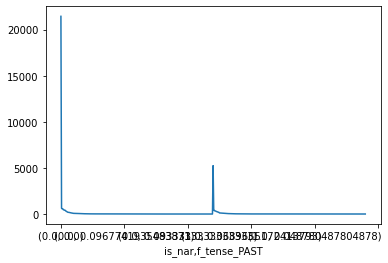

In [258]:
full_db.groupby(['is_nar'])['f_tense_PAST'].value_counts().plot()

In [243]:
with pd.option_context('display.max_colwidth', None):
    display(sent_label_db[sent_label_db['text'].str.contains('הקטנה')])

file_idx  sent_idx  is_question  \
89            1        89     0.000000   
120           1       120     0.000000   
178           1       178     0.000000   
13704        26        31     0.000000   
13705        26        32     0.000000   
14503        28        21     1.000000   
14504        28        22     0.000000   
14507        28        25     0.000000   
14970        28       488     0.000000   
17719        35        44     0.000000   
18293        36       137     0.000000   
18297        36       141     0.000000   
19191        41       124     0.000000   
19423        42       166     0.000000   
22890        52       170     0.000000   
29734        64       754     0.000000   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 text  \
89                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        נשואות  אממ כאילו שהקטנה היא גדולה ממני בשלוש שנים משהו כזה   
120                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        האחות הקטנה מבין שלושתן היא היא מגיעה בשבת בלילה היא גרה קרוב אלינו אז היא באה לאכול אצלנו   
178                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          רגע הקטנה זאת שגרה לידכם   
13704                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [7]:
with pd.option_context('display.max_colwidth', None):
    display(sent_label_db[sent_label_db['text'].str.contains(r'[0-9]')])

doc_idx  sent_idx  \
0            1         0   
38           1        38   
65           1        65   
81           1        81   
92           1        92   
...        ...       ...   
38230       79       238   
38249       79       257   
38314       80        63   
38389       80       138   
38735       80       484   

                                                                                                                                                                                         text  \
0                                                                                                                                          אז היום אנחנו נפגשים פה ב 123  אבל שבוע הבא בחמישי   
38                                                                                                          אנחנו הצוות שלי שהוא אנחנו  123  אנשים אז אנחנו עוברים ליחסית מקום מבודד מכל השאר   
65                                                                                       אממ ההורים שלי  הם כבר כאילו אבא שלי כבר קרוב לפנסיה יחסית כבר  123  ומשו הוא עובד בנק כבר  123  שנה   
81                                                                                                                                       אמא שלי היא  ילידת ארגנטינה עלתה לארץ בגיל  123  כזה   
92                                                                                                                                                      בהפרש יחסית יותר גדול  123  שנים הפרש   
...                                                                                                                                                                                       ...   
38230  אבל אני מאוד מבין  את התחושה הזאתי של השבריריות ש  אם זה מאיים זאת אומרת החוויה שחווית בעבר גם אם זה היה לפני  123  או משהו שנה החוויה היא נורא קשה ועוצמתית ואני מאוד מאוד מבין את זה   
38249                                               ואני באמת חושב שב נשארו לנו עוד  123  פגישות  אני באמת חושב שזה יהיה טוב אם ננסה ככה תביא את הנושאים תחשוב על נושאים שאתה רוצה שנסדר אותם   
38314                                                                    יהיה גם חלק שהוא קצת יותר פתוח קצת יותר דומה למה שאנחנו עושים כאן עכשיו אז ככה שזה לא יהיה איזה שינוי של  123  מעלות   
38389                                                                            כי באמת בסופו של דבר הטיפול הוא פגישה של אה שעה או לפעמים שעתיים בשבוע אה כשיש שבעה ימים ו 123  שעות בכל יום   
38735                                                                                                                  אתה יודע בתור מי שלא הביע כעס על אמא שלו שלושים וכמה שנה עוד מעט  123    

        is_nar  nar_idx  is_client  
0     0.000000 0.000000          0  
38    1.000000 1.000000          1  
65    0.000000 0.000000          1  
81    0.000000 0.000000          1  
92    1.000000 2.000000          1  
...        ...      ...        ...  
38230 0.000000 0.000000          0  
38249 0.000000 0.000000          0  
38314 0.000000 0.000000          0  
38389 0.000000 0.000000          0  
38735 0.000000 0.000000          0  

[938 rows x 6 columns]

In [78]:
sent_lemma_db=pd.merge(sent_label_db,sent_pos_db,left_on=['doc_idx','sent_idx'],right_on=['doc_idx','sent_idx'],validate='one_to_many',how='outer')

In [79]:
sent_lemma_db

file_idx  sent_idx  is_question  \
0              1         0     0.000000   
1              1         0     0.000000   
2              1         0     0.000000   
3              1         0     0.000000   
4              1         0     0.000000   
...          ...       ...          ...   
561539        80       529     0.000000   
561540        80       529     0.000000   
561541        80       529     0.000000   
561542        80       529     0.000000   
561543        80       529     0.000000   

                                                     text  sent_idx_in_block  \
0       אז היום אנחנו נפגשים פה ב 123  אבל שבוע הבא בח...           0.000000   
1       אז היום אנחנו נפגשים פה ב 123  אבל שבוע הבא בח...           0.000000   
2       אז היום אנחנו נפגשים פה ב 123  אבל שבוע הבא בח...           0.000000   
3       אז היום אנחנו נפגשים פה ב 123  אבל שבוע הבא בח...           0.000000   
4       אז היום אנחנו נפגשים פה ב 123  אבל שבוע הבא בח...           0.000000   
...                                                   ...                ...   
561539                                    היה לי מאוד קשה           0.000000   
561540                                    היה לי מאוד קשה           0.000000   
561541                                    היה לי מאוד קשה           0.000000   
561542                                    היה לי מאוד קשה           0.000000   
561543                                    היה לי מאוד קשה           0.000000   

        block_idx   is_nar   doc_idx  par_db_idx  par_idx_in_doc  ...  \
0        0.000000 0.000000  1.000000    0.000000        0.000000  ...   
1        0.000000 0.000000  1.000000    0.000000        0.000000  ...   
2        0.000000 0.000000  1.000000    0.000000        0.000000  ...   
3        0.000000 0.000000  1.000000    0.000000        0.000000  ...   
4        0.000000 0.000000  1.000000    0.000000        0.000000  ...   
...           ...      ...       ...         ...             ...  ...   
561539 232.000000 0.000000 80.000000  224.000000      224.000000  ...   
561540 232.000000 0.000000 80.000000  224.000000      224.000000  ...   
561541 232.000000 0.000000 80.000000  224.000000      224.000000  ...   
561542 232.000000 0.000000 80.000000  224.000000      224.000000  ...   
561543 232.000000 0.000000 80.000000  224.000000      224.000000  ...   

        nar_idx  sent_len is_client  sent_idx_in_par  sent_pos_in_par  \
0      0.000000 50.000000         0                0         1.000000   
1      0.000000 50.000000         0                0         1.000000   
2      0.000000 50.000000         0                0         1.000000   
3      0.000000 50.000000         0                0         1.000000   
4      0.000000 50.000000         0                0         1.000000   
...         ...       ...       ...              ...              ...   
561539 0.000000 15.000000         1                0         1.000000   
561540 0.000000 15.000000         1                0         1.000000   
561541 0.000000 15.000000         1                0         1.000000   
561542 0.000000 15.000000         1                0         1.000000   
561543 0.000000 15.000000         1                0         1.000000   

        sent_pos_in_doc  db_idx    FORM  LEMMA  POSTAG  
0              0.001631       0      אז     אז      RB  
1              0.001631       1    היום   היום      RB  
2              0.001631       2   אנחנו    הוא     PRP  
3              0.001631       3  נפגשים   נפגש      BN  
4              0.001631       4      פה     פה     NNP  
...                 ...     ...     ...    ...     ...  
561539         1.000000    5827     היה    היה     COP  
561540         1.000000    5828       ל      ל      IN  
561541         1.000000    5829     אני    אני   S_PRN  
561542         1.000000    5830    מאוד   מאוד      RB  
561543         1.000000    5831     קשה    קשה      RB  

[561544 rows x 23 columns]

## Retrieve example of narrartive sentence

In [308]:
sent_lemma_db.query('is_nar == 1').groupby(['doc_idx','nar_idx'])['text'].aggregate(''.join())

TypeError: join() takes exactly one argument (0 given)

### Detect most common lemmas for nar/not nar

In [80]:
sent_pos_db =  common_utils.concat_dbs(dir_name,"sent_pos_db",['LEMMA','FORM','sent_idx','POSTAG'],'db_idx')


In [91]:
lemma_count={}
lemma_count['nar']=pd.DataFrame(sent_lemma_db.query('is_nar == 1')['LEMMA'].value_counts())
lemma_count['not_nar']=pd.DataFrame(sent_lemma_db.query('is_nar == 0')['LEMMA'].value_counts())

In [95]:
most_common={}
most_common[100]={}
for i in [100,150]:
    most_common[i]={}
    for key in lemma_count.keys():
        most_common[i][key]={}
        most_common[i][key]['all']=set(lemma_count[key].index.tolist()[:i])
most_common
for i in [100,150]:
    for key in lemma_count.keys():
        another_key = 'not_nar' if key == 'nar' else 'nar'     
        most_common[i][key]['unique']=most_common[i][key]['all']-most_common[i][another_key]['all']


In [96]:
for i in [100,150]:
    for key in lemma_count.keys():
        print("{} : {}".format(i, most_common[i][key]['unique']))

100 : {'חבר', 'אחרי', 'בית', 'שבוע', 'לפני', 'התחיל', 'שנה', 'עבר', 'זכר', 'אצל', 'אמא', 'יצא'}
100 : {'היות', 'אפשר', 'נכון', 'פה', 'למה', 'אמ', 'נראה', 'אמת', 'סדר', 'צד', 'עניין', 'אדם'}
150 : {'פתאום', 'בגלל', 'אתמול', 'די', 'קטע', 'שעה', 'התחלה', 'הכיר', 'אח', 'אחת', 'הילך', 'ילד', 'סיפר', 'אף', 'לפני', 'בכלל', 'זכר', 'זהו', 'אמא', 'חישב'}
150 : {'אממ', 'רגע', 'פחות', 'אפשר', 'מצב', 'נתן', 'אוקיי', 'הסתכל', 'חיים', 'בין', 'בחינה', 'שאת', 'בעצם', 'קודם', 'קיבל', 'ממ', 'לפעמים', 'הראה', 'ברור', 'תחושה'}


In [99]:
total_unique = most_common[100]['nar']['all'].symmetric_difference(most_common[100]['not_nar']['all'])

In [100]:
total_unique

{'אדם',
 'אחרי',
 'אמ',
 'אמא',
 'אמת',
 'אפשר',
 'אצל',
 'בית',
 'היות',
 'התחיל',
 'זכר',
 'חבר',
 'יצא',
 'למה',
 'לפני',
 'נכון',
 'נראה',
 'סדר',
 'עבר',
 'עניין',
 'פה',
 'צד',
 'שבוע',
 'שנה'}

In [103]:
total_stop= most_common[100]['nar']['all'].union(most_common[100]['not_nar']['all']) - total_unique

In [104]:
total_stop

{'XXX',
 '_',
 'אבל',
 'אה',
 'או',
 'אולי',
 'אז',
 'אחד',
 'אחר',
 'איזה',
 'איך',
 'איל',
 'אין',
 'איש',
 'אל',
 'אלה',
 'אם',
 'אמר',
 'אני',
 'את',
 'אתה',
 'ב',
 'בא',
 'באמת',
 'גם',
 'דבר',
 'דיבר',
 'ה',
 'הבין',
 'הגיד',
 'הגיע',
 'הוא',
 'היא',
 'היה',
 'הלך',
 'הם',
 'הרבה',
 'הרגיש',
 'ו',
 'זאת',
 'זה',
 'זמן',
 'חשב',
 'טוב',
 'ידע',
 'יום',
 'יותר',
 'יכול',
 'יש',
 'כ',
 'כאילו',
 'כבר',
 'כול',
 'כי',
 'כך',
 'ככה',
 'כמה',
 'כמו',
 'כן',
 'כש',
 'ל',
 'לא',
 'לקח',
 'מ',
 'מאוד',
 'מה',
 'מישהו',
 'ממש',
 'מקום',
 'משהו',
 'עבודה',
 'עוד',
 'עכשיו',
 'על',
 'עם',
 'עצמו',
 'עשה',
 'פעם',
 'צריך',
 'קצת',
 'קשה',
 'ראה',
 'רצה',
 'רק',
 'ש',
 'של',
 'שם',
 'שני'}

In [105]:
len(total_stop)

88

### Save stop-lists without unique words

In [109]:
import json
json_path = os.path.join(os.getcwd(),defines.PATH_TO_DFS,dir_name,"lemma_stop_non.unique.json")
with open(json_path, 'w') as fp:
    json.dump(list(total_stop),fp,ensure_ascii=False)

### Find counter per stop lemmas

In [145]:
stop_l_counter=pd.DataFrame(sent_lemma_db.query('LEMMA in @total_stop')['LEMMA'].value_counts())
stop_l_counter

LEMMA
ה      39674
הוא    36920
זה     25230
ש      24894
ל      19140
...      ...
הבין     772
איל      721
לקח      712
מישהו    706
רק       703

[88 rows x 1 columns]

In [147]:
common_utils.save_db(stop_l_counter, dir_name, "stop_lemma_counter", keep_index=True)

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/stop_lemma_counter.csv,  index True


### Find counter per unique lemma 

In [163]:
unique_l_counter_nar=pd.DataFrame()
unique_l_counter_nar['nar']=sent_lemma_db.query("LEMMA in  @most_common[100]['nar']['unique']")['LEMMA'].value_counts()
unique_l_counter_not_nar=pd.DataFrame()
unique_l_counter_not_nar['not_nar']=sent_lemma_db.query("LEMMA in  @most_common[100]['not_nar']['unique']")['LEMMA'].value_counts()

In [164]:
unique_l_counter_nar

nar
בית    684
שנה    662
עבר    661
אחרי   637
חבר    598
שבוע   597
יצא    541
התחיל  534
אצל    492
אמא    466
זכר    433
לפני   409

In [165]:
db_name="lemma_unique_nar"
print(db_name)
common_utils.save_db(unique_l_counter_nar, dir_name, db_name, keep_index=True)

lemma_unique_nar
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/lemma_unique_nar.csv,  index True


In [166]:
db_name="lemma_unique_not_nar"
print(db_name)
common_utils.save_db(unique_l_counter_not_nar, dir_name, db_name, keep_index=True)

lemma_unique_not_nar
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/lemma_unique_not_nar.csv,  index True


### Find unque words same as lemmas

In [66]:
sent_label_db = common_utils.concat_dbs(dir_name,"sent_db")

In [67]:
sent_label_db

file_idx  sent_idx  is_question  \
0             1         0     0.000000   
1             1         1     0.000000   
2             1         2     1.000000   
3             1         3     0.000000   
4             1         4     0.000000   
...         ...       ...          ...   
38797        80       525     0.000000   
38798        80       526     0.000000   
38799        80       527     0.000000   
38800        80       528     1.000000   
38801        80       529     0.000000   

                                                    text  sent_idx_in_block  \
0      אז היום אנחנו נפגשים פה ב 123  אבל שבוע הבא בח...           0.000000   
1                                                     כן           0.000000   
2                                        אוקיי  מה שלומך           0.000000   
3                                               ברוך השם           0.000000   
4                                    מחר יש לכם יום טיול           0.000000   
...                                                  ...                ...   
38797                              שאני מרגיש בהם לא נוח           3.000000   
38798                        אז כאילו למה למה אני מתגעגע           4.000000   
38799                            או למה אני למה אני רוצה           5.000000   
38800                                 והצלחת לענות לעצמך           0.000000   
38801                                    היה לי מאוד קשה           0.000000   

       block_idx   is_nar   doc_idx  par_db_idx  par_idx_in_doc  \
0       0.000000 0.000000  1.000000    0.000000        0.000000   
1       1.000000 0.000000  1.000000    1.000000        1.000000   
2       2.000000 0.000000  1.000000    2.000000        2.000000   
3       3.000000 0.000000  1.000000    3.000000        3.000000   
4       4.000000 0.000000  1.000000    4.000000        4.000000   
...          ...      ...       ...         ...             ...   
38797 230.000000 0.000000 80.000000  222.000000      222.000000   
38798 230.000000 0.000000 80.000000  222.000000      222.000000   
38799 230.000000 0.000000 80.000000  222.000000      222.000000   
38800 231.000000 0.000000 80.000000  223.000000      223.000000   
38801 232.000000 0.000000 80.000000  224.000000      224.000000   

       par_pos_in_doc   par_type block_type  nar_idx  sent_len  is_client  \
0            0.004878  therapist    not_nar 0.000000 50.000000          0   
1            0.009756     client    not_nar 0.000000  2.000000          1   
2            0.014634  therapist    not_nar 0.000000 16.000000          0   
3            0.019512     client    not_nar 0.000000  8.000000          1   
4            0.024390  therapist    not_nar 0.000000 19.000000          0   
...               ...        ...        ...      ...       ...        ...   
38797        0.991111     client    not_nar 0.000000 21.000000          1   
38798        0.991111     client    not_nar 0.000000 27.000000          1   
38799        0.991111     client    not_nar 0.000000 23.000000          1   
38800        0.995556  therapist    not_nar 0.000000 19.000000          0   
38801        1.000000     client    not_nar 0.000000 15.000000          1   

       sent_idx_in_par  sent_pos_in_par  sent_pos_in_doc  
0                    0         1.000000         0.001631  
1                    0         1.000000         0.003263  
2                    0         1.000000         0.004894  
3                    0         1.000000         0.006525  
4                    0         1.000000         0.008157  
...                ...              ...              ...  
38797                3         0.666667         0.992453  
38798                4         0.833333         0.994340  
38799                5         1.000000         0.996226  
38800                0         1.000000         0.998113  
38801                0         1.000000         1.000000  

[38802 rows x 19 columns]

In [118]:
sent_label_db['text'].str.split(expand=True)#apply(lambda x: x.split())

0      1      2       3     4       5     6     7     8     9    \
0          אז   היום  אנחנו  נפגשים    פה       ב   123   אבל  שבוע   הבא   
1          כן   None   None    None  None    None  None  None  None  None   
2       אוקיי     מה  שלומך    None  None    None  None  None  None  None   
3        ברוך    השם   None    None  None    None  None  None  None  None   
4         מחר     יש    לכם     יום  טיול    None  None  None  None  None   
...       ...    ...    ...     ...   ...     ...   ...   ...   ...   ...   
38776    שאני  מרגיש    בהם      לא   נוח    None  None  None  None  None   
38777      אז  כאילו    למה     למה   אני  מתגעגע  None  None  None  None   
38778      או    למה    אני     למה   אני    רוצה  None  None  None  None   
38779  והצלחת  לענות  לעצמך    None  None    None  None  None  None  None   
38780     היה     לי   מאוד     קשה  None    None  None  None  None  None   

       ...   311   312   313   314   315   316   317   318   319   320  
0      ...  None  None  None  None  None  None  None  None  None  None  
1      ...  None  None  None  None  None  None  None  None  None  None  
2      ...  None  None  None  None  None  None  None  None  None  None  
3      ...  None  None  None  None  None  None  None  None  None  None  
4      ...  None  None  None  None  None  None  None  None  None  None  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
38776  ...  None  None  None  None  None  None  None  None  None  None  
38777  ...  None  None  None  None  None  None  None  None  None  None  
38778  ...  None  None  None  None  None  None  None  None  None  None  
38779  ...  None  None  None  None  None  None  None  None  None  None  
38780  ...  None  None  None  None  None  None  None  None  None  None  

[38781 rows x 321 columns]

In [68]:
word_db=pd.DataFrame((sent_label_db.set_index(['sent_idx','is_nar']))['text'].apply(lambda x: x.split()).explode()).reset_index()

In [69]:
word_db

sent_idx   is_nar    text
0              0 0.000000      אז
1              0 0.000000    היום
2              0 0.000000   אנחנו
3              0 0.000000  נפגשים
4              0 0.000000      פה
...          ...      ...     ...
427311       528 0.000000   לעצמך
427312       529 0.000000     היה
427313       529 0.000000      לי
427314       529 0.000000    מאוד
427315       529 0.000000     קשה

[427316 rows x 3 columns]

In [78]:
word_db[word_db['text']=='ישיבה'].groupby('is_nar')['text'].value_counts()

is_nar    text 
0.000000  ישיבה     8
1.000000  ישיבה    15
Name: text, dtype: int64

In [132]:
word_count={}
word_count['nar']=pd.DataFrame(word_db.query('is_nar == 1')['text'].value_counts())
word_count['not_nar']=pd.DataFrame(word_db.query('is_nar == 0')['text'].value_counts())

In [133]:
most_common_w={}
most_common_w[100]={}
for i in [100,150]:
    most_common_w[i]={}
    for key in word_count.keys():
        most_common_w[i][key]={}
        most_common_w[i][key]['all']=set(word_count[key].index.tolist()[:i])

for i in [100,150]:
    for key in word_count.keys():
        another_key = 'not_nar' if key == 'nar' else 'nar'     
        most_common_w[i][key]['unique']=most_common_w[i][key]['all']-most_common_w[i][another_key]['all']

In [134]:
for i in [100,150]:
    for key in word_count.keys():
        print("{} : {}".format(i, most_common_w[i][key]['unique']))

100 : {'אחרי', 'היום', 'רק', 'אמרה', 'ולא', 'לפני', 'שלו', 'אמר', 'יום', 'הייתה', 'היו', 'אמרתי', 'לה', 'הם'}
100 : {'נכון', 'שלך', 'פה', 'אותך', 'האלה', 'חושבת', 'שאתה', 'שאת', 'בעצם', 'מרגיש', 'אמ', 'אנחנו', 'שיש', 'כמו'}
150 : {'פתאום', 'אמרה', 'הרגשתי', 'איתה', 'איתו', 'איתי', 'זוכר', 'אותה', 'שלו', 'והוא', 'והיא', 'אחרי', 'בבית', 'אחת', 'שלה', 'היו', 'אמר', 'לפני', 'וכאילו', 'אמא'}
150 : {'אממ', 'חושבת', 'איזשהו', 'פעמים', 'במקום', 'פחות', 'בדיוק', 'זמן', 'תמיד', 'אפשר', 'היית', 'אוקיי', 'יהיה', 'שאת', 'שני', 'מצד', 'עצמי', 'לפעמים', 'הדברים', 'יכולה'}


In [135]:
total_unique_w = most_common_w[100]['nar']['all'].symmetric_difference(most_common_w[100]['not_nar']['all'])
total_stop_w = most_common_w[100]['nar']['all'].union(most_common_w[100]['not_nar']['all']) - total_unique_w

In [136]:
total_unique_w

{'אותך',
 'אחרי',
 'אמ',
 'אמר',
 'אמרה',
 'אמרתי',
 'אנחנו',
 'בעצם',
 'האלה',
 'היו',
 'היום',
 'הייתה',
 'הם',
 'ולא',
 'חושבת',
 'יום',
 'כמו',
 'לה',
 'לפני',
 'מרגיש',
 'נכון',
 'פה',
 'רק',
 'שאת',
 'שאתה',
 'שיש',
 'שלו',
 'שלך'}

In [137]:
total_stop_w

{'123',
 'XXX',
 'אבל',
 'אה',
 'או',
 'אולי',
 'אומר',
 'אומרת',
 'אותו',
 'אותי',
 'אז',
 'אחד',
 'איזה',
 'איך',
 'אין',
 'אם',
 'אני',
 'אנשים',
 'את',
 'אתה',
 'ב',
 'באמת',
 'בסדר',
 'גם',
 'דברים',
 'ה',
 'הוא',
 'הזה',
 'הזמן',
 'היא',
 'היה',
 'הייתי',
 'הרבה',
 'ו',
 'ואז',
 'ואני',
 'וזה',
 'זאת',
 'זה',
 'חושב',
 'טוב',
 'יודע',
 'יודעת',
 'יותר',
 'יכול',
 'יש',
 'כאילו',
 'כבר',
 'כזה',
 'כי',
 'כך',
 'ככה',
 'כל',
 'כמה',
 'כן',
 'לא',
 'להיות',
 'לו',
 'לי',
 'לך',
 'למה',
 'לעשות',
 'מאוד',
 'מה',
 'ממש',
 'משהו',
 'נגיד',
 'עוד',
 'עושה',
 'עכשיו',
 'על',
 'עם',
 'פעם',
 'צריך',
 'קצת',
 'קשה',
 'רוצה',
 'ש',
 'שאני',
 'שהוא',
 'שהיא',
 'שזה',
 'של',
 'שלא',
 'שלי',
 'שם'}

### Save stop word list without unique words

In [151]:
import json
json_path = os.path.join(os.getcwd(),defines.PATH_TO_DFS,dir_name,"word_stop_non.unique.json")
with open(json_path, 'w') as fp:
    json.dump(list(total_stop_w),fp,ensure_ascii=False)

### Find counter per unique stop words

In [160]:
unique_w_counter_nar=pd.DataFrame()
unique_w_counter_nar['nar']=word_db.query("text in  @most_common_w[100]['nar']['unique']")['text'].value_counts()
unique_w_counter_not_nar=pd.DataFrame()
unique_w_counter_not_nar['not_nar']=word_db.query("text in  @most_common_w[100]['not_nar']['unique']")['text'].value_counts()

In [162]:
db_name="word_unique_nar"
print(db_name)
common_utils.save_db(unique_w_counterc_nar, dir_name, db_name, keep_index=True)

word_unique_nar
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/word_unique_nar.csv,  index True


In [167]:
db_name="word_unique_not_nar"
print(db_name)
common_utils.save_db(unique_w_counter_not_nar, dir_name, db_name, keep_index=True)

word_unique_not_nar
Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/word_unique_not_nar.csv,  index True


In [88]:
nar_count.index.tolist()[:100]

['ה',
 'הוא',
 'זה',
 'ש',
 'ל',
 'ו',
 'ב',
 'לא',
 'את',
 'אני',
 'היה',
 'כאילו',
 'אז',
 'של',
 'אמר',
 'אה',
 'כ',
 'מה',
 'מ',
 'גם',
 'כול',
 'אבל',
 'היא',
 'על',
 'כן',
 'ידע',
 'אתה',
 'עם',
 'עשה',
 'XXX',
 'איזה',
 'יש',
 'משהו',
 'כי',
 'זאת',
 'או',
 'רצה',
 'דבר',
 'יכול',
 'אם',
 'שם',
 'בא',
 '_',
 'מאוד',
 'דיבר',
 'יום',
 'פעם',
 'עכשיו',
 'יותר',
 'חשב',
 'כבר',
 'צריך',
 'אל',
 'זמן',
 'עוד',
 'אין',
 'הרגיש',
 'ראה',
 'טוב',
 'איש',
 'ממש',
 'מקום',
 'הלך',
 'הגיד',
 'אחד',
 'ככה',
 'אחרי',
 'הרבה',
 'באמת',
 'קצת',
 'כש',
 'הגיע',
 'אלה',
 'אולי',
 'איך',
 'כמה',
 'עבודה',
 'עצמו',
 'חבר',
 'שנה',
 'בית',
 'לקח',
 'כך',
 'התחיל',
 'איל',
 'זכר',
 'שבוע',
 'אמא',
 'קשה',
 'עבר',
 'אחר',
 'הבין',
 'הם',
 'רק',
 'מישהו',
 'לפני',
 'יצא',
 'כמו',
 'שני',
 'אצל']

In [142]:
stop_w_counter=pd.DataFrame(word_db.query('text in @total_stop_w')['text'].value_counts())
stop_w_counter

text
זה     16440
לא     15267
אני    12664
את      9413
כאילו   8591
...      ...
עושה     774
קשה      761
כמה      727
הזמן     677
שלא      669

[86 rows x 1 columns]

In [149]:
common_utils.save_db(stop_w_counter, dir_name, "stop_word_counter", keep_index=True)

Saving /scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis/dataframes/reparse/stop_word_counter.csv,  index True


In [201]:
count_db=pd.DataFrame(sent_lemma_db['LEMMA'].value_counts())

In [202]:
count_db.reset_index(inplace=True)

In [203]:
count_db.rename({'LEMMA':'counter'},axis=1,inplace=True)

In [204]:
count_db.rename({'index':'LEMMA'},axis=1,inplace=True)

In [205]:
count_db.describe()

counter
count  9787.000000
mean     57.376520
std     812.389233
min       1.000000
25%       1.000000
50%       2.000000
75%       8.000000
max   39674.000000

In [206]:
count_db

LEMMA  counter
0            ה    39674
1          הוא    36920
2           זה    25230
3            ש    24894
4            ל    19140
...        ...      ...
9782      וחצי        1
9783      יבשת        1
9784    מטרפות        1
9785       זה↓        1
9786  התקיימות        1

[9787 rows x 2 columns]

<AxesSubplot:>

<Figure size 2160x2160 with 0 Axes>

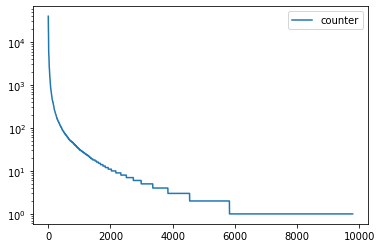

In [207]:
plt.figure(figsize = (30,30))
count_db.plot(logy=True)

In [210]:
count_db[100:120]

LEMMA  counter
100   נורא      630
101  עניין      627
102    למה      609
103   אפשר      599
104    חבר      598
105   שבוע      597
106    קרה      597
107    אדם      586
108     בן      570
109   תמיד      564
110   פשוט      557
111    דרך      549
112   ניסה      547
113    יצא      541
114    עצם      541
115    קשר      539
116  התחיל      534
117  אנחנו      519
118    עבד      518
119  אפילו      505

In [181]:
most_common_lemma=count_db['LEMMA'].tolist()
# most_common_lemma

In [182]:
from wordcloud import WordCloud
font_path="./external_src/OpenSans-VariableFont_wdth,wght.ttf"
word_cloud = WordCloud(
    font_path=font_path,
    collocations = False,
    background_color = 'white',
    max_words=200,
    stopwords=most_common_lemma[:100],
    max_font_size=100)

In [183]:
plt.figure(figsize = (30,30))
text = ' '.join(sent_lemma_db['LEMMA'])
word_cloud.generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Entire corpus",fontsize=50)
plt.show()

TypeError: sequence item 73672: expected str instance, float found

<Figure size 2160x2160 with 0 Axes>

In [64]:
sent_lemma_db.query("is_nar == 1")['LEMMA']

NameError: name 'sent_lemma_db' is not defined

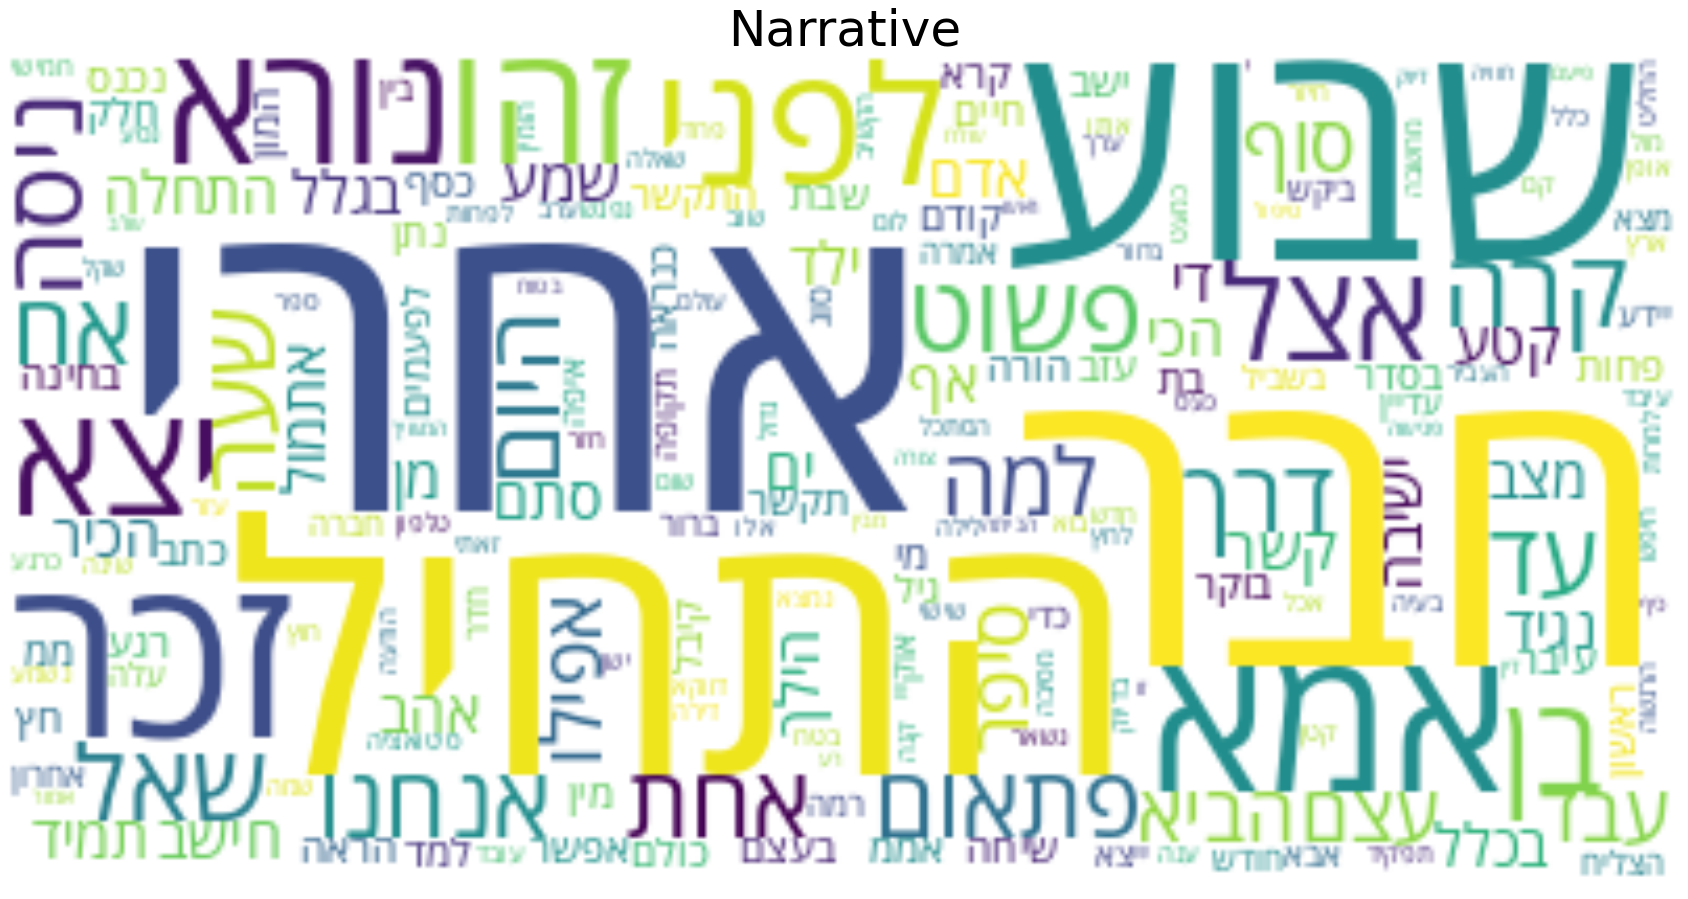

In [118]:
plt.figure(figsize = (30,30))
text_nar = ' '.join(sent_lemma_db.query("is_nar == 1")['LEMMA'])
word_cloud.generate(text_nar)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Narrative",fontsize=50)
plt.show()

In [220]:
most_common = count_db[:100]['LEMMA'].tolist()

In [226]:
nar_lemma_count = pd.DataFrame(sent_lemma_db.query('LEMMA.isin(@most_common) and is_nar ==1')['LEMMA'].value_counts())
nar_lemma_count

LEMMA
ה     11482
הוא   10878
זה     6825
ש      6227
ל      6151
...     ...
אמת     175
סדר     173
היות    151
נכון    137
צד      130

[100 rows x 1 columns]

In [227]:
not_nar_lemma_count=pd.DataFrame(sent_lemma_db.query('LEMMA.isin(@most_common) and is_nar ==0')['LEMMA'].value_counts())
not_nar_lemma_count

LEMMA
ה     28192
הוא   26042
ש     18667
זה    18405
ל     12989
...     ...
לקח     468
עבר     447
בית     439
שנה     412
אחרי    322

[100 rows x 1 columns]

In [232]:
most_common_db=pd.merge(not_nar_lemma_count,nar_lemma_count,left_index=True, right_index=True,validate='one_to_one',suffixes=['not_nar','is_nar'])
most_common_db

LEMMAnot_nar  LEMMAis_nar
ה            28192        11482
הוא          26042        10878
ש            18667         6227
זה           18405         6825
ל            12989         6151
...            ...          ...
לקח            468          244
עבר            447          214
בית            439          245
שנה            412          250
אחרי           322          315

[100 rows x 2 columns]

<AxesSubplot:>

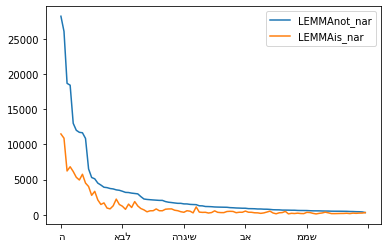

In [235]:
most_common_db.plot()

<AxesSubplot:>

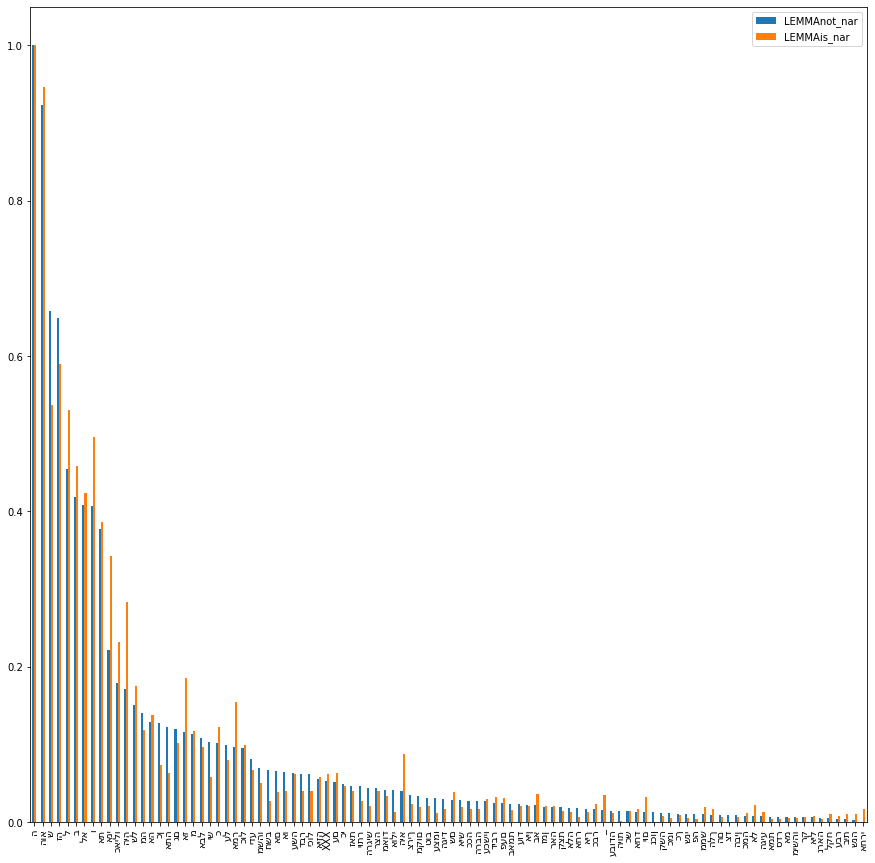

In [246]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# fig,ax=plt.subplots(figsize=(15,15))
x_t=np.arange(0,len(most_common_db.index)+1,5)
x_scaled = pd.DataFrame(MinMaxScaler().fit_transform(most_common_db),columns=most_common_db.columns,index=most_common_db.index)
x_scaled.plot(figsize=(15,15))#,xticks=x_t)#ax=ax)

In [217]:
sent_lemma_db.query("is_nar == 0")['LEMMA'].value_counts()

ה         28192
הוא       26042
ש         18667
זה        18405
ל         12989
          ...  
זהעפו         1
אנושות        1
דבשת          1
קונטרה        1
שגשג          1
Name: LEMMA, Length: 8101, dtype: int64

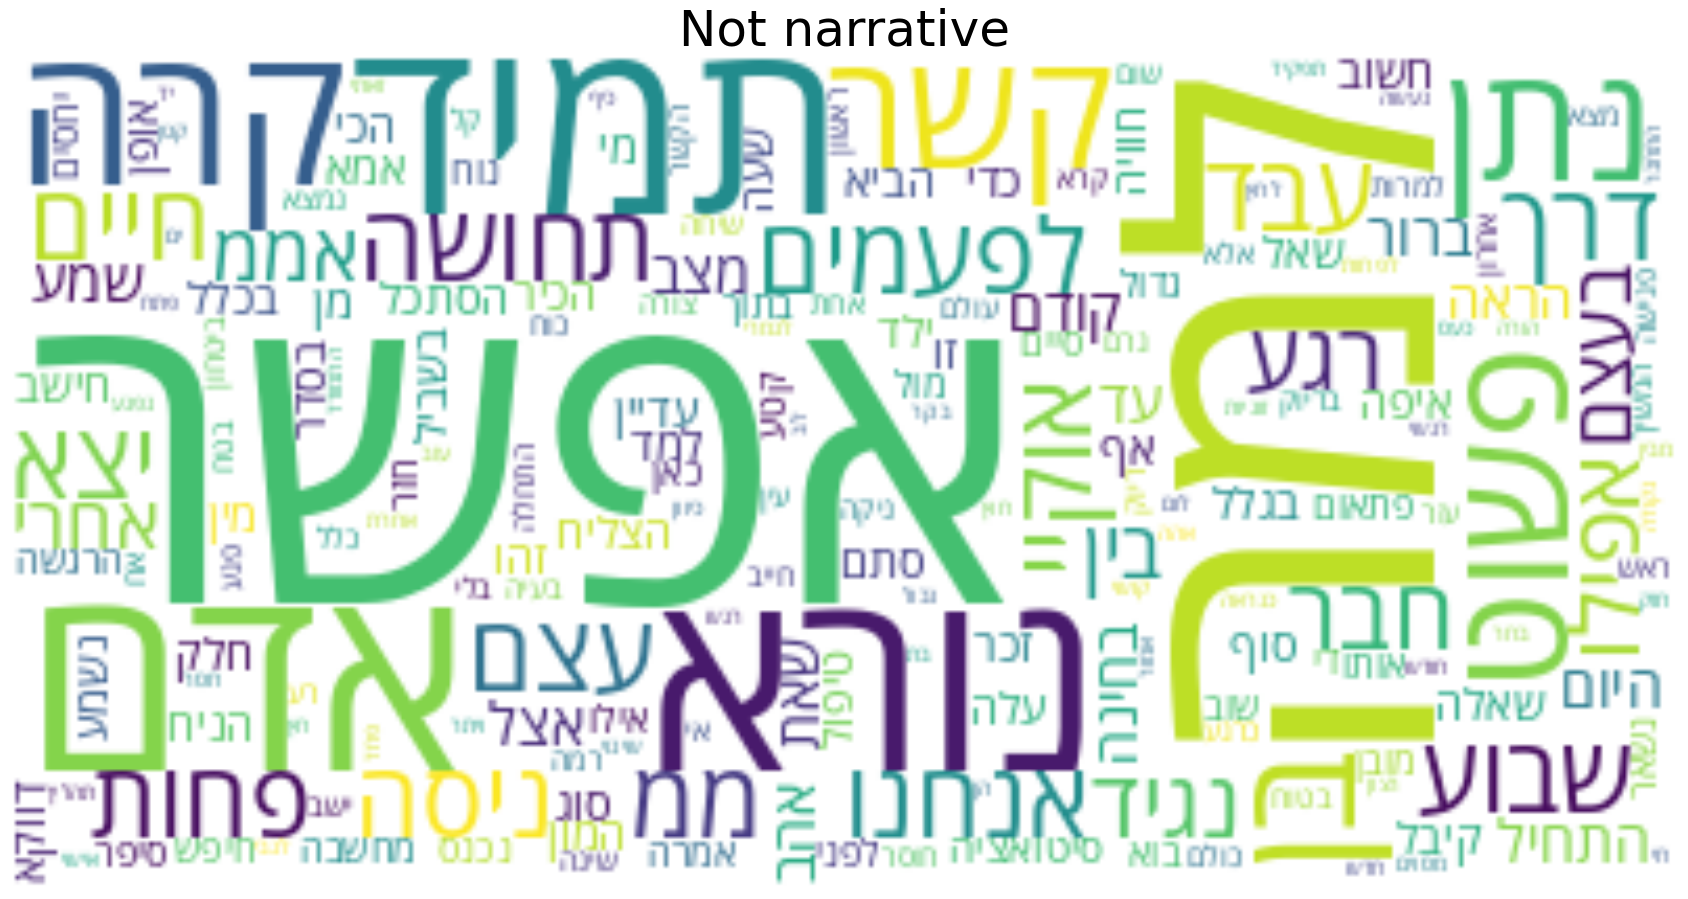

In [119]:
plt.figure(figsize = (30,30))
text_nar = ' '.join(sent_lemma_db.query("is_nar == 0")['LEMMA'])
word_cloud.generate(text_nar)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Not narrative",fontsize=50)
plt.show()

## Save stop_lemmas

In [120]:
dir_name

'clean_chars'

In [121]:
import json
json_path = os.path.join(os.getcwd(),defines.PATH_TO_DFS,dir_name,"my_stop_lemmas.json")
with open(json_path, 'w') as fp:
    json.dump(most_common_lemma,fp,ensure_ascii=False)

# Check most common WORDS

In [184]:
def get_words_from_db(db):
    return flatten(db['text'].str.split().tolist())

In [185]:
word_db=pd.DataFrame(get_words_from_db(sent_label_db),columns=['text'])
word_db

text
0           אז
1         היום
2        אנחנו
3       נפגשים
4           פה
...        ...
427377   לעצמך
427378     היה
427379      לי
427380    מאוד
427381     קשה

[427382 rows x 1 columns]

In [215]:
word_count_db[word_count_db['index'].str.contains(r'[a-z,A-Z]{1,}[א-ת]{1,}')]

index  text
16072   forbiddenאז     1
18372  CLIENTבנתיים     1
21820       CBTיסטי     1
25771   THERAPISTמה     1

In [214]:
word_count_db= pd.DataFrame(word_db['text'].value_counts())
word_count_db.reset_index(inplace=True)
word_count_db

index   text
0             זה  16440
1             לא  15267
2            אני  12664
3             את   9413
4          כאילו   8591
...          ...    ...
26153    מתפתחות      1
26154    בשינקין      1
26155     הלמצוא      1
26156     שלשנות      1
26157  והכיוונים      1

[26158 rows x 2 columns]

In [187]:
word_count_db.rename({'text':'counter'},axis=1,inplace=True)
word_count_db.rename({'index':'word'},axis=1,inplace=True)

In [188]:
word_count_db

word  counter
0             זה    16440
1             לא    15267
2            אני    12664
3             את     9413
4          כאילו     8591
...          ...      ...
26153    מתפתחות        1
26154    בשינקין        1
26155     הלמצוא        1
26156     שלשנות        1
26157  והכיוונים        1

[26158 rows x 2 columns]

In [189]:
word_count_db[100:120]

word  counter
100    שלא      669
101     לה      653
102     רק      649
103   היום      643
104    ולא      637
105   הזאת      621
106   פשוט      613
107    וגם      609
108   האלה      606
109    דבר      592
110  הייתה      590
111  להגיד      582
112   נורא      580
113   רואה      573
114    לזה      568
115   נראה      566
116    אדם      539
117     בא      536
118    בזה      532
119    שני      530

In [190]:
most_comomn_words = word_count_db['word'].tolist()

In [105]:
# most_comomn_words

## Save stop_words

In [191]:
import json
json_path = os.path.join(os.getcwd(),defines.PATH_TO_DFS,dir_name,"my_stop_words.json")
with open(json_path, 'w') as fp:
    json.dump(most_comomn_words,fp,ensure_ascii=False)

In [192]:
from wordcloud import WordCloud
font_path="./external_src/OpenSans-VariableFont_wdth,wght.ttf"
word_cloud = WordCloud(
    font_path=font_path,
    collocations = False,
    background_color = 'white',
    max_words=200,
    stopwords=most_comomn_words[:100],
    max_font_size=100)

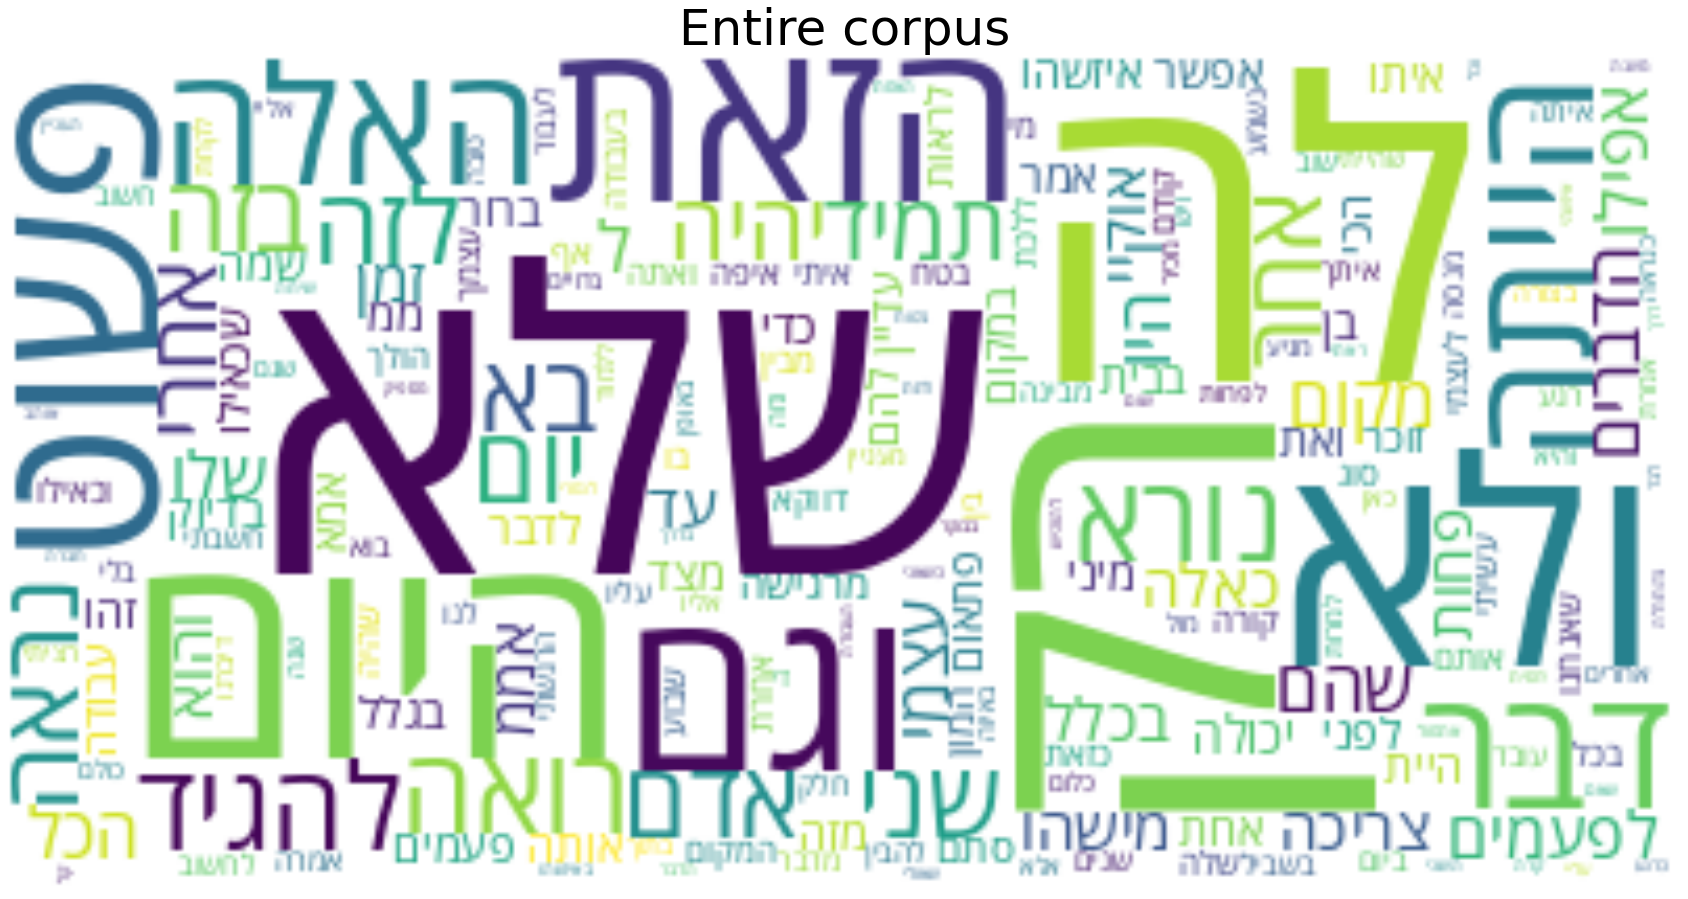

In [193]:
plt.figure(figsize = (30,30))
word_cloud.generate(' '.join(get_words_from_db(sent_label_db)))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Entire corpus",fontsize=50)
plt.show()

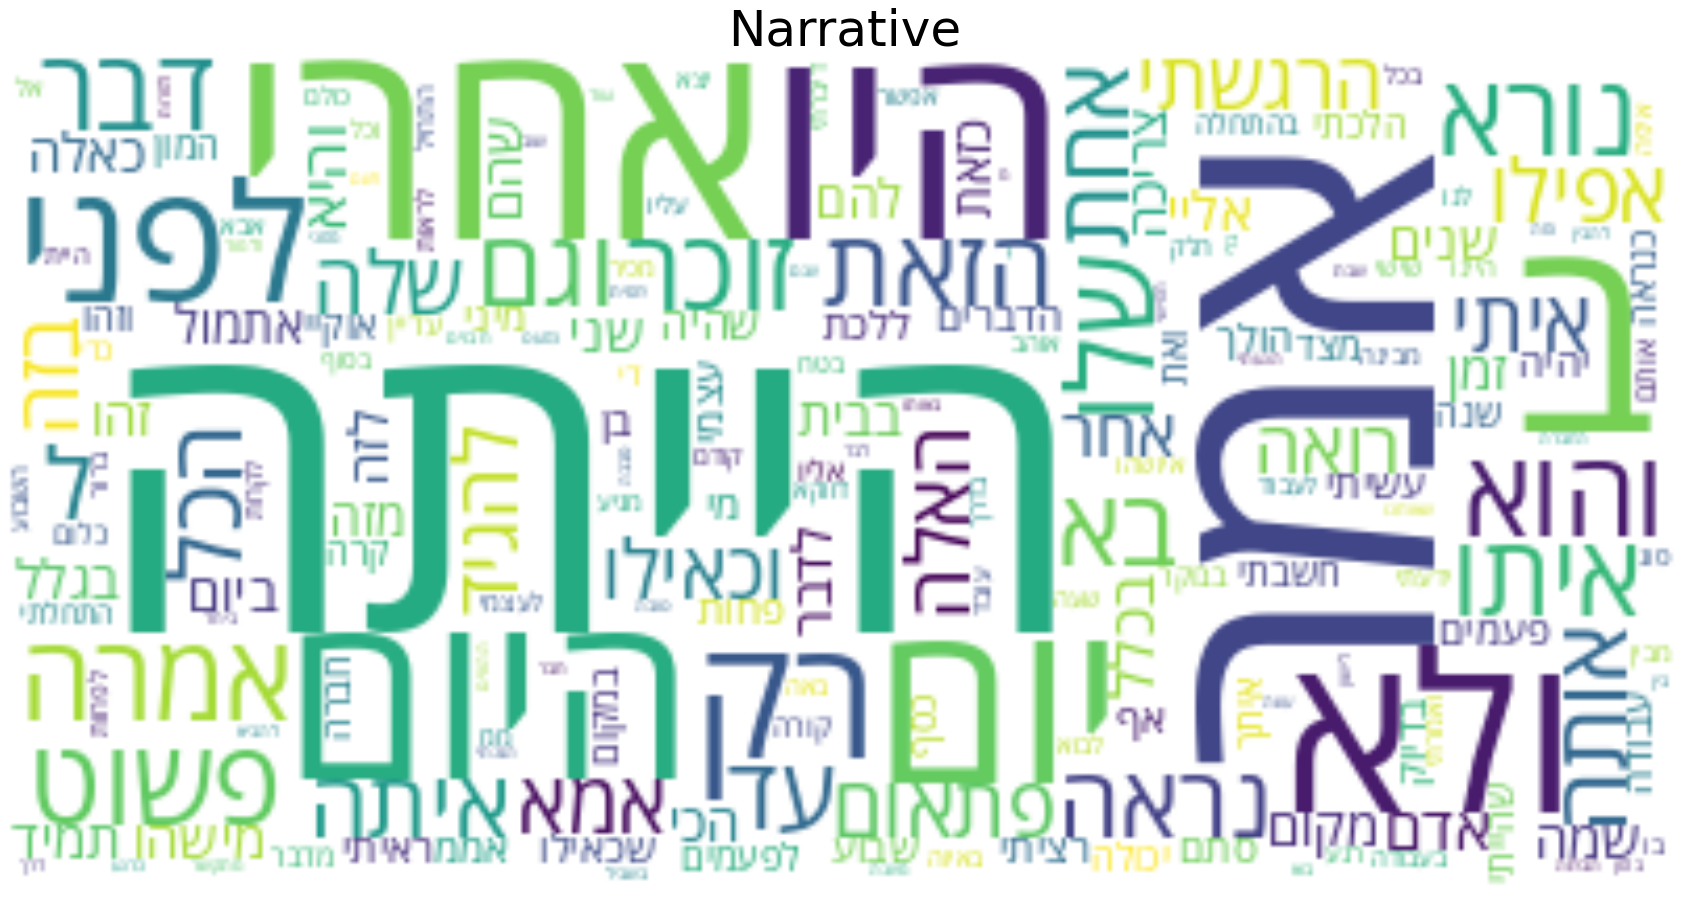

In [132]:
plt.figure(figsize = (30,30))
word_cloud.generate(' '.join(get_words_from_db(sent_label_db.query("is_nar == 1"))))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Narrative",fontsize=50)
plt.show()

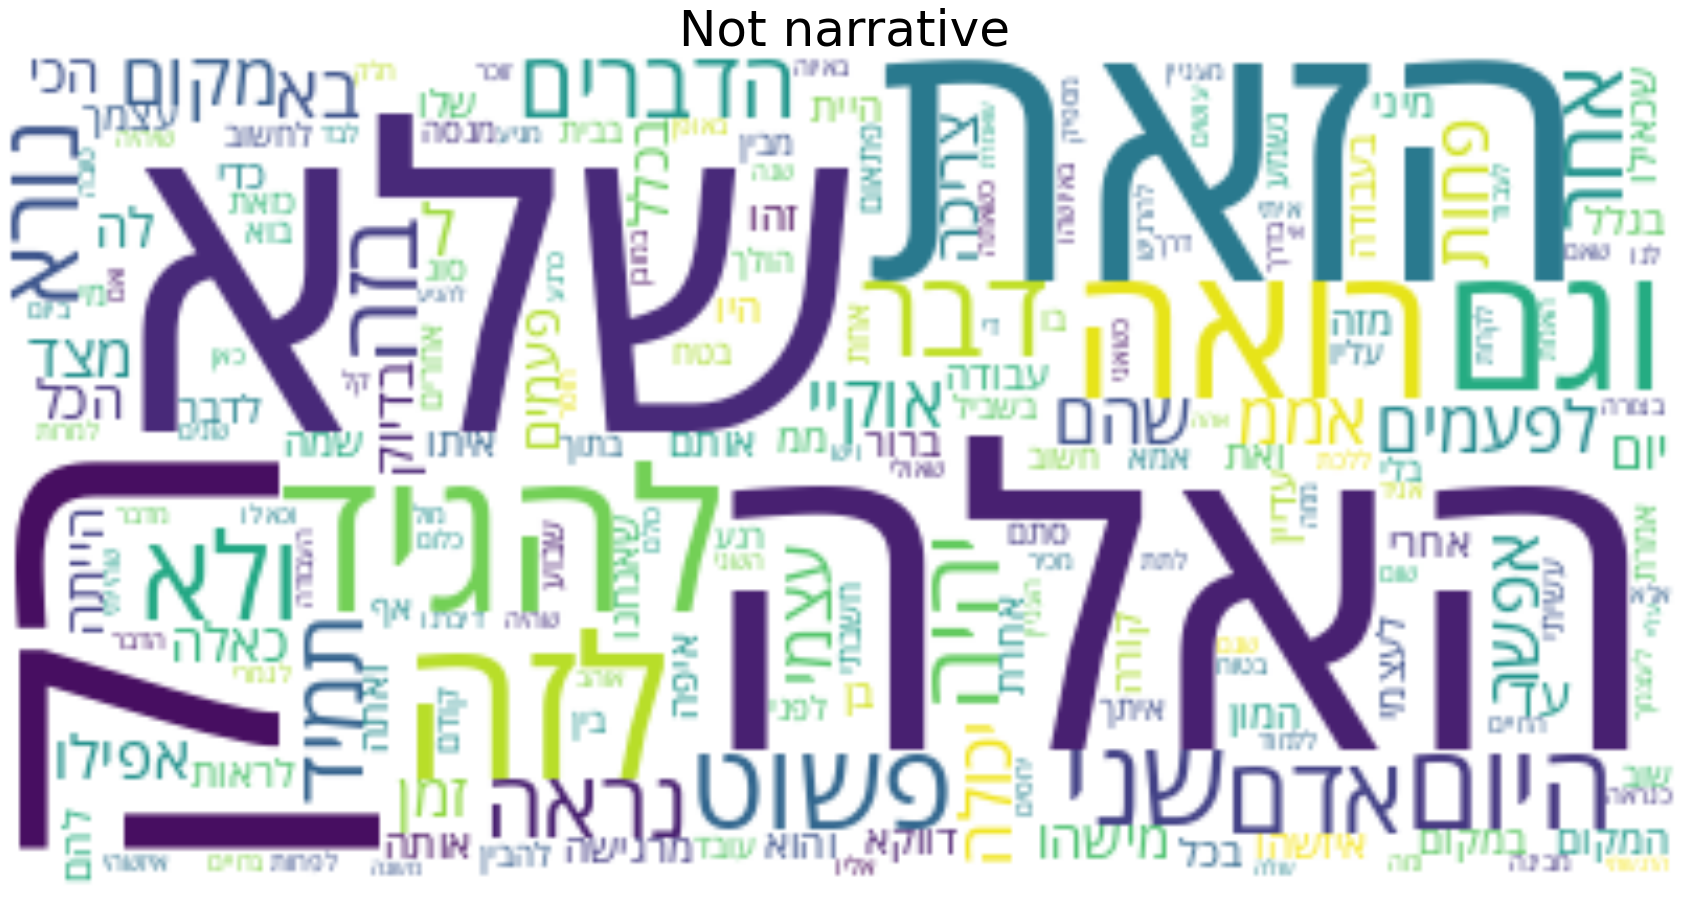

In [194]:
plt.figure(figsize = (30,30))
word_cloud.generate(' '.join(get_words_from_db(sent_label_db.query("is_nar == 0"))))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Not narrative",fontsize=50)
plt.show()

In [3]:
merged_db = common_utils.concat_dbs(dir_name,"merged_db")
merged_db.head()

doc_idx  merged_idx  is_question   is_nar  par_idx_in_doc  sent_len  \
0        1           0     0.000000 0.000000        0.000000 47.000000   
1        1           1     0.000000 0.000000        1.000000  2.000000   
2        1           2     1.000000 0.000000        2.000000 15.000000   
3        1           3     0.000000 0.000000        3.000000  8.000000   
4        1           4     0.000000 0.000000        4.000000 19.000000   

   is_client  sent_idx_in_par  sent_pos_in_par  sent_pos_in_doc  ...  f_per_3  \
0          0                0         1.000000         0.001724  ... 0.000000   
1          1                0         1.000000         0.003448  ... 0.000000   
2          0                0         1.000000         0.005172  ... 0.000000   
3          1                0         1.000000         0.006897  ... 0.000000   
4          0                0         1.000000         0.008621  ... 0.000000   

   f_per_A  f_tense_BEINONI  f_tense_FUTURE  f_tense_IMPERATIVE  f_tense_PAST  \
0 0.100000         0.000000        0.000000            0.000000      0.000000   
1 0.000000         0.000000        0.000000            0.000000      0.000000   
2 0.000000         0.000000        0.000000            0.000000      0.000000   
3 0.000000         0.000000        0.000000            0.000000      0.000000   
4 0.000000         0.000000        0.000000            0.000000      0.000000   

   POSTAG_NEG  POSTAG_TTL  POSTAG_yyCM  POSTAG_NNPT  
0         NaN         NaN          NaN          NaN  
1         NaN         NaN          NaN          NaN  
2         NaN         NaN          NaN          NaN  
3         NaN         NaN          NaN          NaN  
4         NaN         NaN          NaN          NaN  

[5 rows x 68 columns]

<Figure size 1080x576 with 0 Axes>

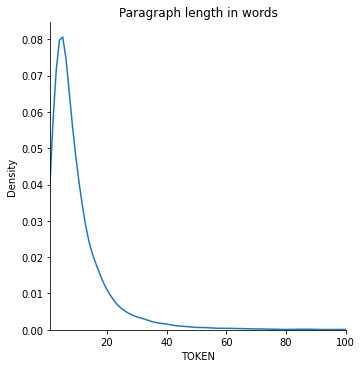

In [16]:
plt.figure(figsize = (15,8))
par_len_words = merged_db.groupby(['doc_idx','merged_idx','par_idx_in_doc'])
par_len_sns =  sns.displot(data=merged_db,
                            x='TOKEN',
                            kind='kde',
                            common_norm=False
                           )
par_len_sns.set(title="Paragraph length in words",xlim=((1,100)))

<Figure size 576x1080 with 0 Axes>

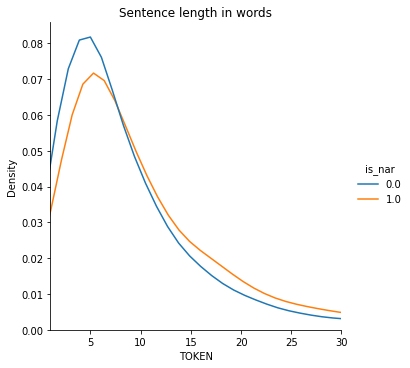

In [17]:
plt.figure(figsize = (8,15))
sent_len_words = merged_db.groupby(['doc_idx','merged_idx'])
sent_len_sns =  sns.displot(data=merged_db,
                            x='TOKEN',
                            kind='kde',
                            hue='is_nar',
                            common_norm=False
                           )
sent_len_sns.set(title="Sentence length in words",xlim=((1,30)))

In [96]:
imp.reload(feature_utils)
sent_db = common_utils.concat_dbs(dir_name,"sent_db")#,defines.SENT_FEATURES)
sent_db

file_idx  sent_idx  is_question  \
0             1         0     0.000000   
1             1         1     0.000000   
2             1         2     1.000000   
3             1         3     0.000000   
4             1         4     0.000000   
...         ...       ...          ...   
38797        80       525     0.000000   
38798        80       526     0.000000   
38799        80       527     0.000000   
38800        80       528     1.000000   
38801        80       529     0.000000   

                                                    text  sent_idx_in_block  \
0      אז היום אנחנו נפגשים פה ב 123  אבל שבוע הבא בח...           0.000000   
1                                                     כן           0.000000   
2                                        אוקיי  מה שלומך           0.000000   
3                                               ברוך השם           0.000000   
4                                    מחר יש לכם יום טיול           0.000000   
...                                                  ...                ...   
38797                              שאני מרגיש בהם לא נוח           3.000000   
38798                        אז כאילו למה למה אני מתגעגע           4.000000   
38799                            או למה אני למה אני רוצה           5.000000   
38800                                 והצלחת לענות לעצמך           0.000000   
38801                                    היה לי מאוד קשה           0.000000   

       block_idx   is_nar   doc_idx  par_db_idx  par_idx_in_doc  \
0       0.000000 0.000000  1.000000    0.000000        0.000000   
1       1.000000 0.000000  1.000000    1.000000        1.000000   
2       2.000000 0.000000  1.000000    2.000000        2.000000   
3       3.000000 0.000000  1.000000    3.000000        3.000000   
4       4.000000 0.000000  1.000000    4.000000        4.000000   
...          ...      ...       ...         ...             ...   
38797 230.000000 0.000000 80.000000  222.000000      222.000000   
38798 230.000000 0.000000 80.000000  222.000000      222.000000   
38799 230.000000 0.000000 80.000000  222.000000      222.000000   
38800 231.000000 0.000000 80.000000  223.000000      223.000000   
38801 232.000000 0.000000 80.000000  224.000000      224.000000   

       par_pos_in_doc   par_type block_type  nar_idx  sent_len  is_client  \
0            0.004878  therapist    not_nar 0.000000 50.000000          0   
1            0.009756     client    not_nar 0.000000  2.000000          1   
2            0.014634  therapist    not_nar 0.000000 16.000000          0   
3            0.019512     client    not_nar 0.000000  8.000000          1   
4            0.024390  therapist    not_nar 0.000000 19.000000          0   
...               ...        ...        ...      ...       ...        ...   
38797        0.991111     client    not_nar 0.000000 21.000000          1   
38798        0.991111     client    not_nar 0.000000 27.000000          1   
38799        0.991111     client    not_nar 0.000000 23.000000          1   
38800        0.995556  therapist    not_nar 0.000000 19.000000          0   
38801        1.000000     client    not_nar 0.000000 15.000000          1   

       sent_idx_in_par  sent_pos_in_par  sent_pos_in_doc  
0                    0         1.000000         0.001631  
1                    0         1.000000         0.003263  
2                    0         1.000000         0.004894  
3                    0         1.000000         0.006525  
4                    0         1.000000         0.008157  
...                ...              ...              ...  
38797                3         0.666667         0.992453  
38798                4         0.833333         0.994340  
38799                5         1.000000         0.996226  
38800                0         1.000000         0.998113  
38801                0         1.000000         1.000000  

[38802 rows x 19 columns]

Total num of paragraph

In [100]:
(sent_db.groupby('doc_idx')['par_idx_in_doc'].max().sum()+80)/80

188.55

In [98]:
sent_db['text'].str.count(' ').sum()+sent_db.shape[0]

450604

In [86]:
doc_stat_db = pd.DataFrame()

def get_doc_statistic(doc_idx):
    sent_db = pd.read_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"{:02d}_sent_db.csv".format(i)),usecols=['is_nar','nar_idx','sent_len','is_client'])
    nar_num = sent_db['nar_idx'].nunique()
    avrg_sent_len_nar = sent_db.query('is_nar == 1')['sent_len'].mean()
    groupby(['doc_idx'])['nar_idx'].nunique()
    del sent_db

In [20]:
sent_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36324 entries, 0 to 36323
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   doc_idx          36324 non-null  int64  
 1   sent_idx         36324 non-null  int64  
 2   is_question      36324 non-null  float64
 3   is_nar           36324 non-null  float64
 4   par_idx_in_doc   36324 non-null  float64
 5   sent_len         36324 non-null  float64
 6   is_client        36324 non-null  int64  
 7   sent_idx_in_par  36324 non-null  int64  
 8   sent_pos_in_par  36324 non-null  float64
 9   sent_pos_in_doc  36324 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 2.8 MB


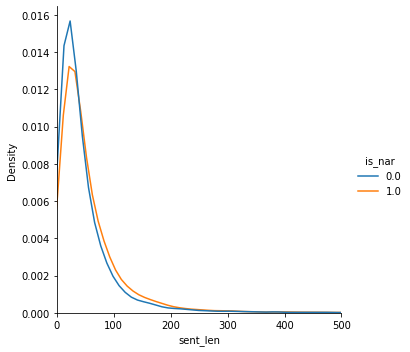

In [21]:
sent_len = sns.displot(data=sent_db,
                       x='sent_len',
                       hue='is_nar',
                       kind='kde',
                       common_norm=False,  # Normalize each distribution independently
                      )
sent_len.set(xlim=(0, 500))

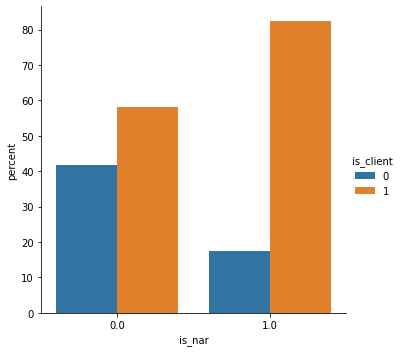

In [87]:
x,y = 'is_nar', 'is_client'

(sent_db
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

In [24]:
par_db = common_utils.concat_dbs(dir_name,"par_db",['par_len','par_type','is_nar'])
par_db

doc_idx  par_idx    par_len   par_type   is_nar
0            1        0  49.000000  therapist 0.000000
1            1        1   3.000000     client 0.000000
2            1        2  17.000000  therapist 0.000000
3            1        3  14.000000     client 0.000000
4            1        4  22.000000  therapist 0.000000
...        ...      ...        ...        ...      ...
15063       80      220 132.000000     client 0.000000
15064       80      221  97.000000  therapist 0.000000
15065       80      222 371.000000     client 0.000000
15066       80      223  20.000000  therapist 0.000000
15067       80      224  17.000000     client 0.000000

[15068 rows x 5 columns]

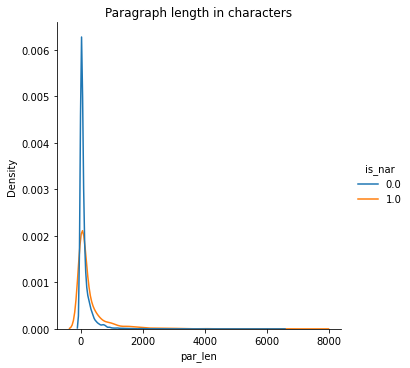

In [25]:
par_len_char = sns.displot(data=par_db,
                       x='par_len',
                       hue='is_nar',
                       kind='kde',
                       common_norm=False,  # Normalize each distribution independently
                      )
par_len_char.set(title='Paragraph length in characters')

### Chek distrib of par len in sentences

In [26]:
sent_db

doc_idx  sent_idx  is_question   is_nar  par_idx_in_doc  sent_len  \
0            1         0     0.000000 0.000000        0.000000 47.000000   
1            1         1     0.000000 0.000000        1.000000  2.000000   
2            1         2     1.000000 0.000000        2.000000 15.000000   
3            1         3     0.000000 0.000000        3.000000  8.000000   
4            1         4     0.000000 0.000000        4.000000 19.000000   
...        ...       ...          ...      ...             ...       ...   
36319       80       486     0.000000 0.000000      222.000000 21.000000   
36320       80       487     0.000000 0.000000      222.000000 27.000000   
36321       80       488     0.000000 0.000000      222.000000 23.000000   
36322       80       489     1.000000 0.000000      223.000000 19.000000   
36323       80       490     0.000000 0.000000      224.000000 15.000000   

       is_client  sent_idx_in_par  sent_pos_in_par  sent_pos_in_doc  
0              0                0         1.000000         0.001724  
1              1                0         1.000000         0.003448  
2              0                0         1.000000         0.005172  
3              1                0         1.000000         0.006897  
4              0                0         1.000000         0.008621  
...          ...              ...              ...              ...  
36319          1                3         0.666667         0.991853  
36320          1                4         0.833333         0.993890  
36321          1                5         1.000000         0.995927  
36322          0                0         1.000000         0.997963  
36323          1                0         1.000000         1.000000  

[36324 rows x 10 columns]

In [101]:
par_len_count = sent_db.groupby(['doc_idx','par_idx_in_doc'])['sent_idx'].count()
par_len_count

doc_idx    par_idx_in_doc
1.000000   0.000000          1
           1.000000          1
           2.000000          1
           3.000000          1
           4.000000          1
                            ..
80.000000  220.000000        3
           221.000000        2
           222.000000        6
           223.000000        1
           224.000000        1
Name: sent_idx, Length: 14939, dtype: int64

In [102]:
par_len_count.describe()

count   14939.000000
mean        2.597363
std         4.101660
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        87.000000
Name: sent_idx, dtype: float64

In [30]:
# find par with max length
par_len_count.idxmax(),par_len_count.max()

((5, 19.0), 111)

In [31]:
par_len_count.reset_index(drop=True).median()

1.0

In [32]:
par_len_count.quantile(q=0.95)

8.0

In [33]:
par_len_count.quantile(q=0.5)

1.0

In [34]:
par_len_count.quantile(q=0.75)

2.0

<Figure size 1080x576 with 0 Axes>

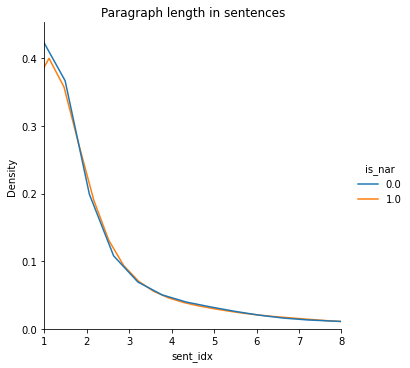

In [35]:
plt.figure(figsize = (15,8))
par_len_sent =  sns.displot(data=sent_db,x=par_len_count.reset_index(drop=True),
                            kind='kde',
                            hue='is_nar',
                            common_norm=False
                           )
par_len_sent.set(title="Paragraph length in sentences",xlim=((1,8)))

[Text(0.5, 1.0, 'Paragraph length in sentences')]

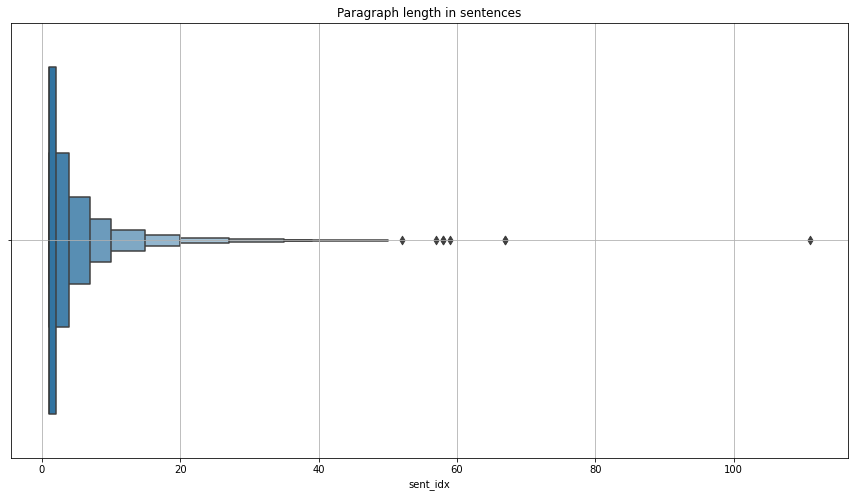

In [36]:
plt.figure(figsize = (15,8))
par_len_sent_b = sns.boxenplot(data=sent_db,
                               x=par_len_count.reset_index(drop=True),
                               hue='is_nar')
par_len_sent_b.grid()
par_len_sent_b.set(title="Paragraph length in sentences")